###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Goal:
<font color=darkblue>
    
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.


###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Resources Available:  
<font color=darkblue>
&nbsp;
The historical data for this project is available in file
&nbsp;
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
    
###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Attribute information
###  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Input variables:

Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account

Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*

Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaign

Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Deliverable - 1: 
<font color=darkblue>
Exploratory data quality report reflecting the following – (20) 
<br>Univariate, Missing Values, Outliers and Bivariate
    
1. Univariate analysis (12 marks)
<ol>
 <li>
     Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
 </li>
<li>
    Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
</li>
<li>
Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.
</li>
</ol>
2. Multivariate analysis (8 marks)
<ol>
 <li>
Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
 </li>
 <li>
 Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots
</li>
</ol>

# Import all necessary modules and load the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline

## 1 Load and review data

In [2]:
df = pd.read_csv("bank-full.csv");
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# Print the datatypes of each column and the shape of the dataset

In [3]:
df.shape

(45211, 17)

In [4]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [5]:
df.dtypes.value_counts()

object    10
int64      7
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">We might need to convert object type into a categorical type.</span>

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

# Print the descriptive statistics of each & every column using describe() function

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> IQR  -

In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age           15.00
balance    1,356.00
day           13.00
duration     216.00
campaign       2.00
pdays          0.00
previous       0.00
dtype: float64


<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">There are negative values in balance and pdays</span>
<br>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">There is wide dispersion when you inspect some values. For example min and max values of Balance</span>

In [9]:
df.mode()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,124,1,-1,0,unknown,no


In [10]:
df.median()

age         39.00
balance    448.00
day         16.00
duration   180.00
campaign     2.00
pdays       -1.00
previous     0.00
dtype: float64

# Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc.

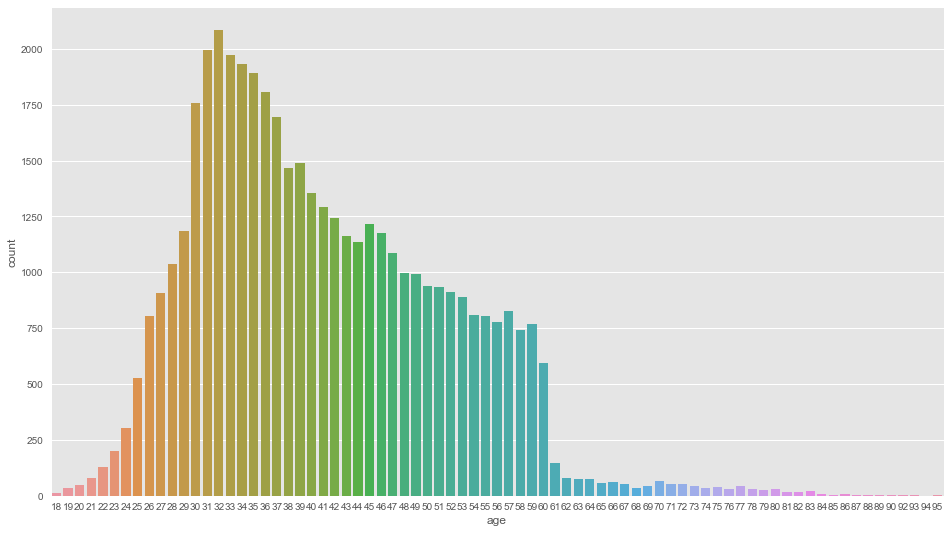

In [11]:
plt.figure(figsize=(16,9)) # set figure size.
age = df['age']
sns.countplot(age)

<br>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Mean and median are close together. The Age distribution is positively skewed by a very narrow margin.</span>

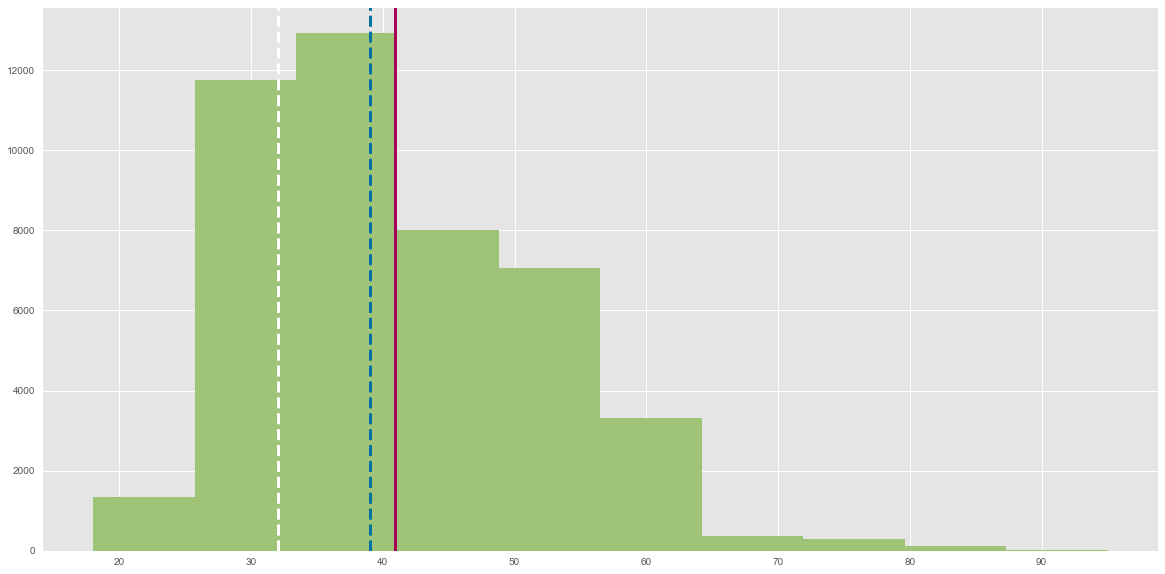

In [12]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(age, color='g') # plots a simple histogram
plt.axvline(age.mean(), color='m', linewidth=3)
plt.axvline(age.median(), color='b', linestyle='dashed', linewidth=3)
plt.axvline(age.mode()[0], color='w', linestyle='dashed', linewidth=3)

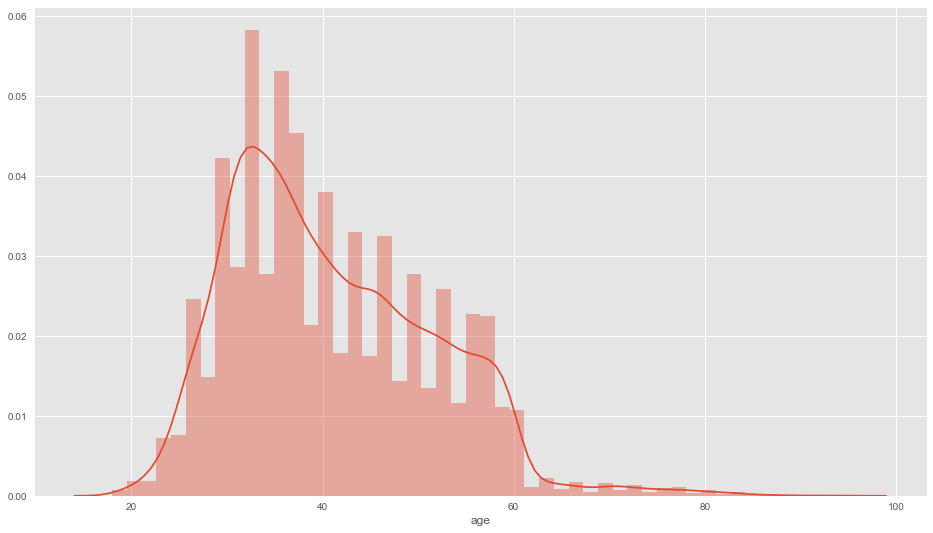

In [13]:
plt.figure(figsize=(16,9)) # set figure size.
sns.distplot(df['age'])

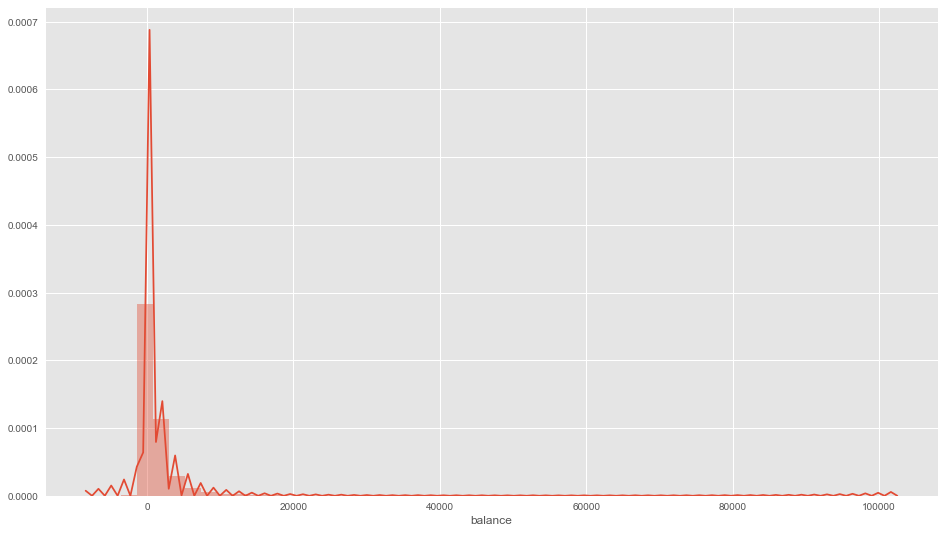

In [14]:
plt.figure(figsize=(16,9)) # set figure size.
balance = df['balance']
sns.distplot(df['balance'])

<br>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Balance is positively skewed</span>

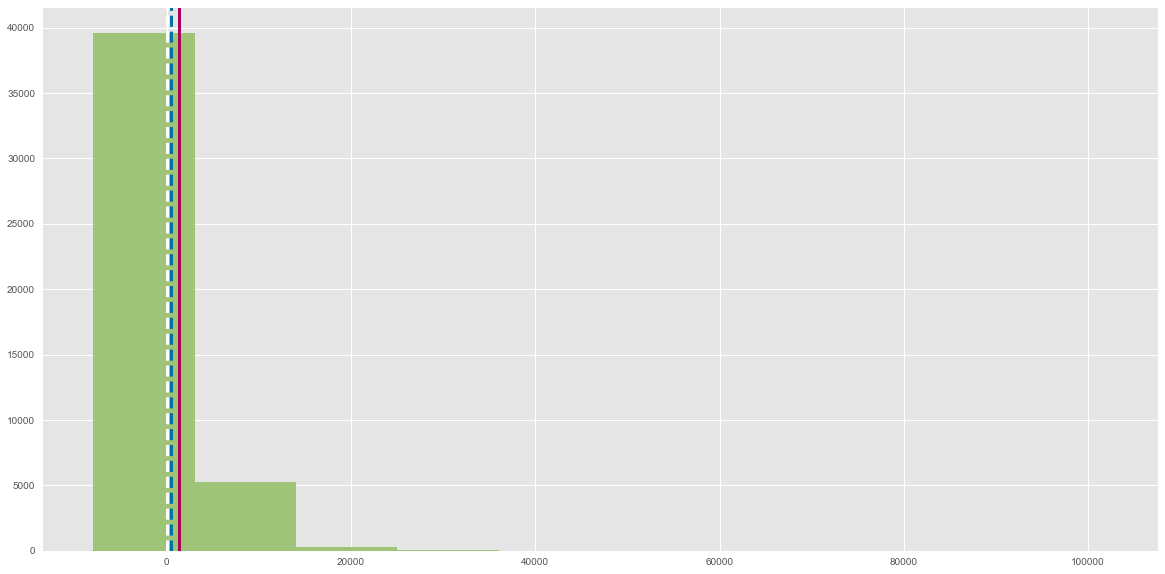

In [15]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(balance, color='g') # plots a simple histogram
plt.axvline(balance.mean(), color='m', linewidth=3)
plt.axvline(balance.median(), color='b', linestyle='dashed', linewidth=3)
plt.axvline(balance.mode()[0], color='w', linestyle='dashed', linewidth=3)

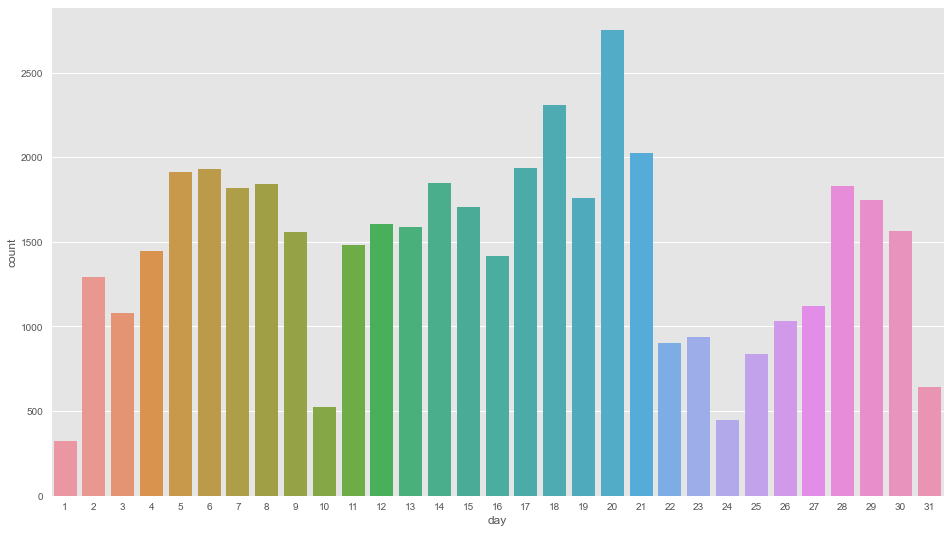

In [16]:
plt.figure(figsize=(16,9)) # set figure size.
day = df['day']
sns.countplot(df['day'])

<br>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Day is Symetically distrubuted</span>

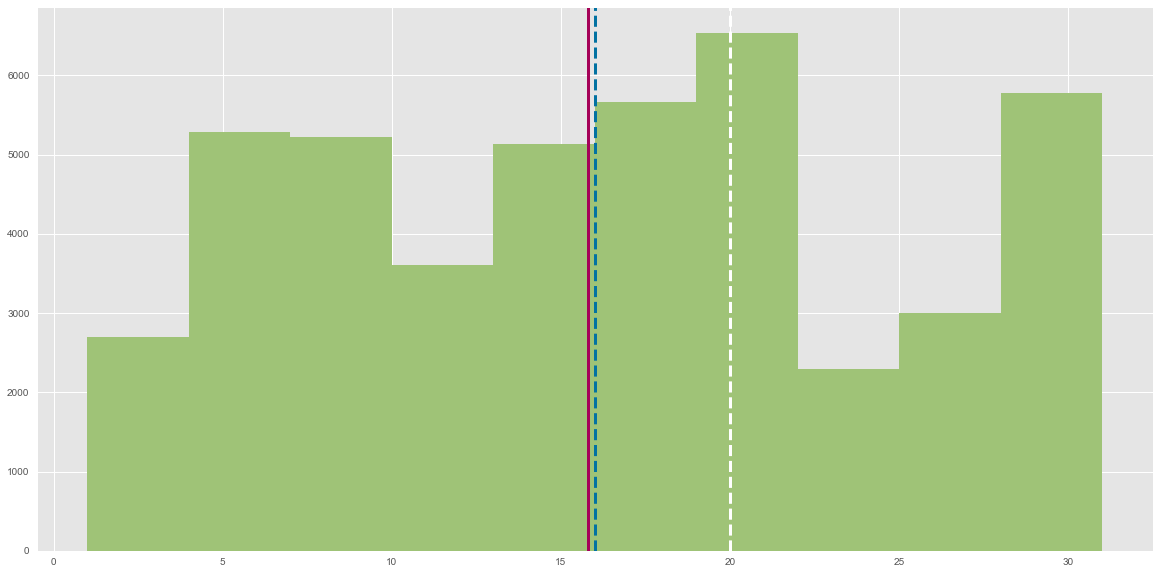

In [17]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(day, color='g') # plots a simple histogram
plt.axvline(day.mean(), color='m', linewidth=3)
plt.axvline(day.median(), color='b', linestyle='dashed', linewidth=3)
plt.axvline(day.mode()[0], color='w', linestyle='dashed', linewidth=3)

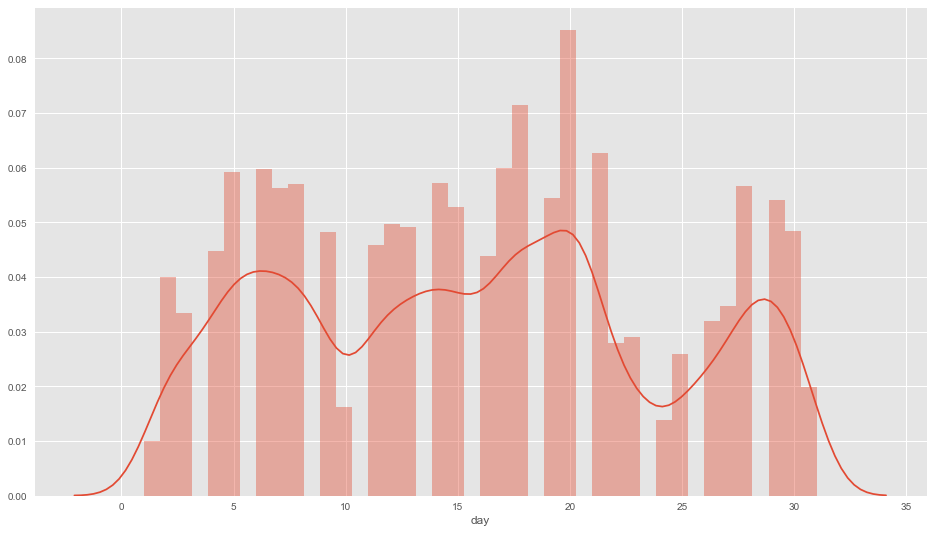

In [18]:
plt.figure(figsize=(16,9)) # set figure size.
sns.distplot(df['day'])

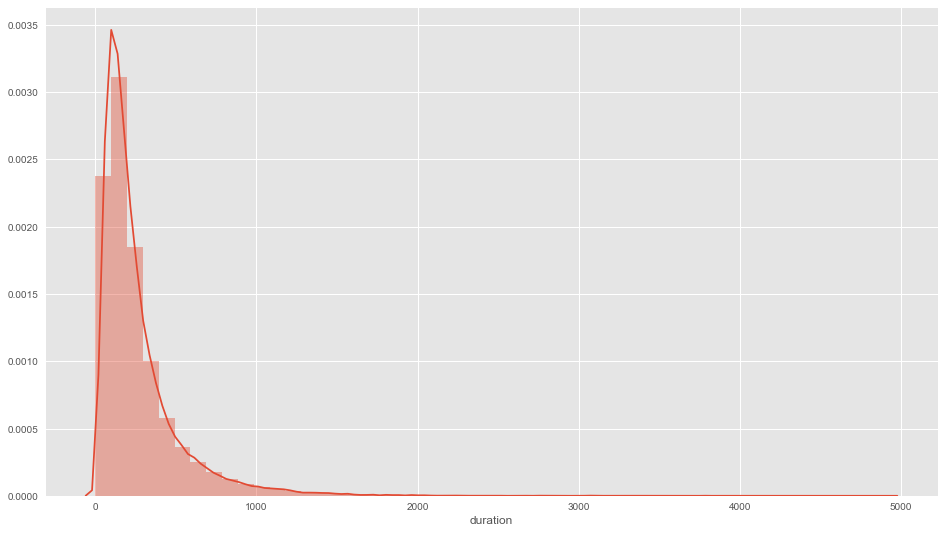

In [19]:
plt.figure(figsize=(16,9)) # set figure size.
duration = df['duration']
sns.distplot(df['duration'])

<br>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">duration is positively skewed</span>

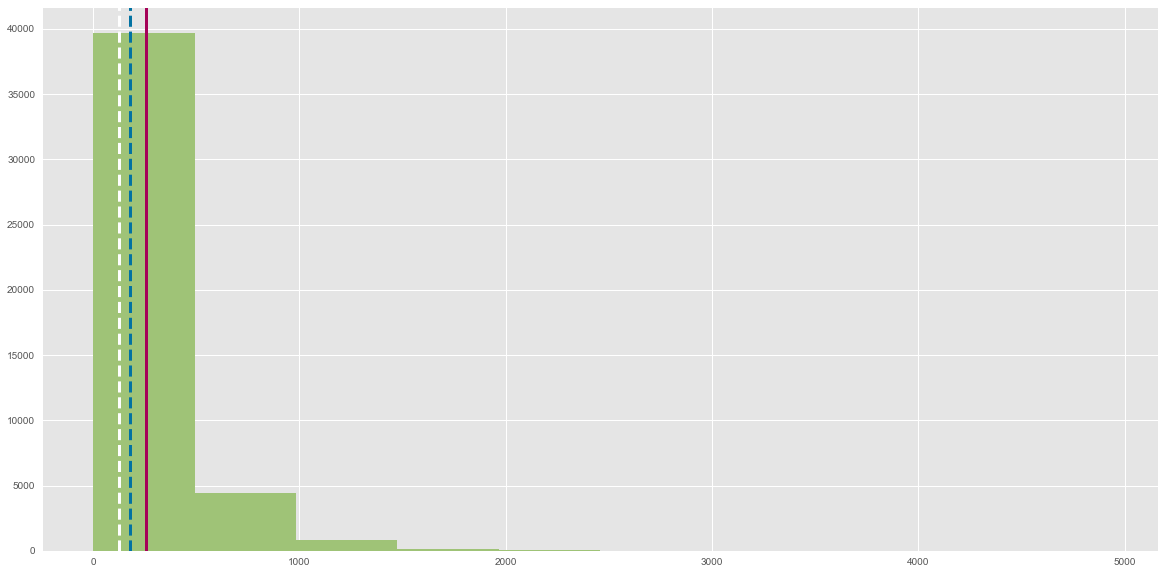

In [20]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(duration, color='g') # plots a simple histogram
plt.axvline(duration.mean(), color='m', linewidth=3)
plt.axvline(duration.median(), color='b', linestyle='dashed', linewidth=3)
plt.axvline(duration.mode()[0], color='w', linestyle='dashed', linewidth=3)

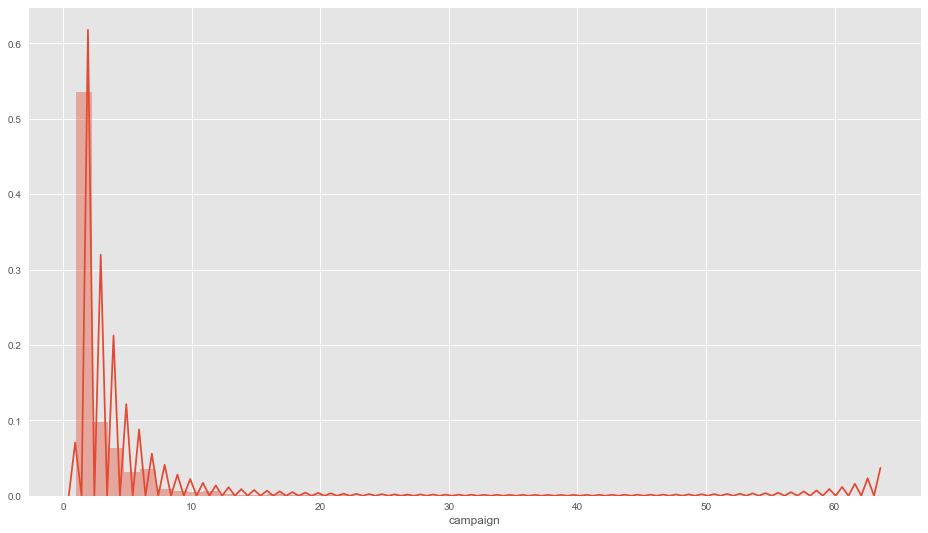

In [21]:
plt.figure(figsize=(16,9)) # set figure size.
campaign = df['campaign']
sns.distplot(df['campaign'])

<br>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">campaign is positively skewed</span>

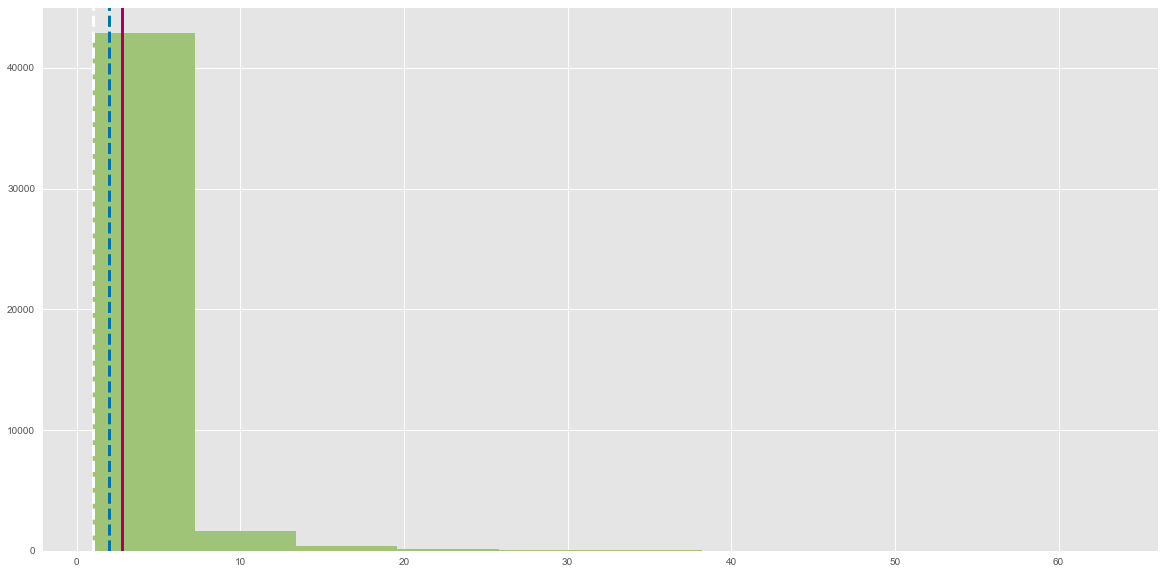

In [22]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(campaign, color='g') # plots a simple histogram
plt.axvline(campaign.mean(), color='m', linewidth=3)
plt.axvline(campaign.median(), color='b', linestyle='dashed', linewidth=3)
plt.axvline(campaign.mode()[0], color='w', linestyle='dashed', linewidth=3)

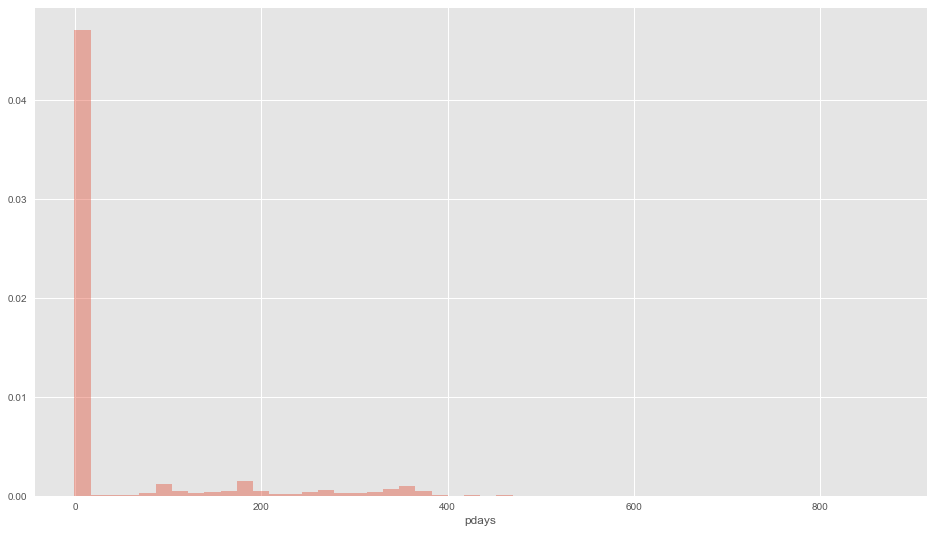

In [23]:
plt.figure(figsize=(16,9)) # set figure size.
pdays = df['pdays']
sns.distplot(df['pdays'])

<br>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">pdays is positively skewed but it is not apparanent from the vizualization below</span>

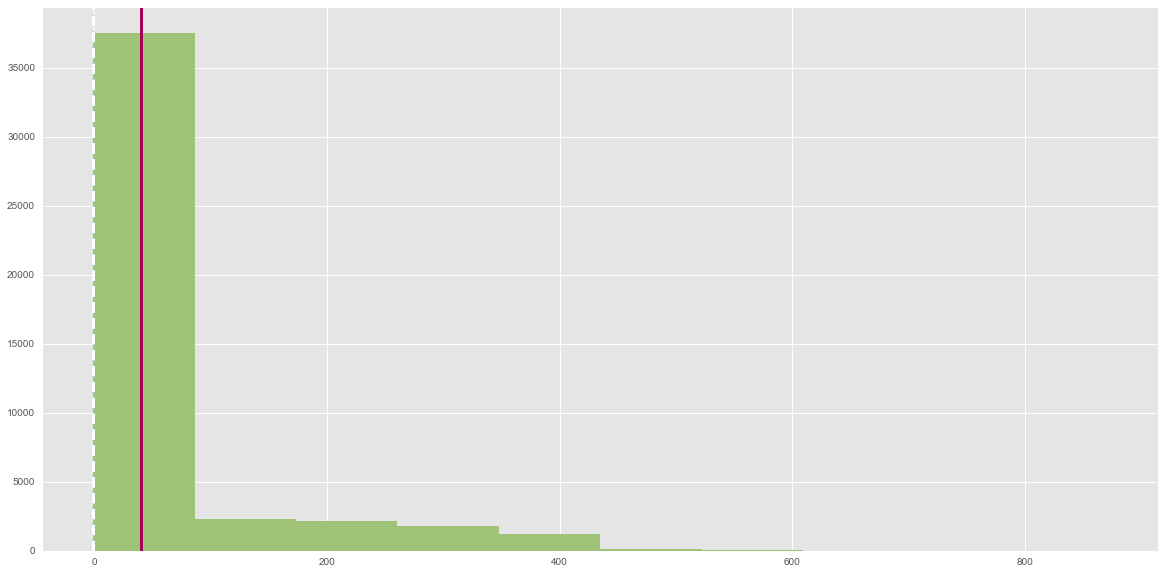

In [24]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(pdays, color='g') # plots a simple histogram
plt.axvline(pdays.mean(), color='m', linewidth=3)
plt.axvline(pdays.median(), color='b', linestyle='dashed', linewidth=3)
plt.axvline(pdays.mode()[0], color='w', linestyle='dashed', linewidth=3)

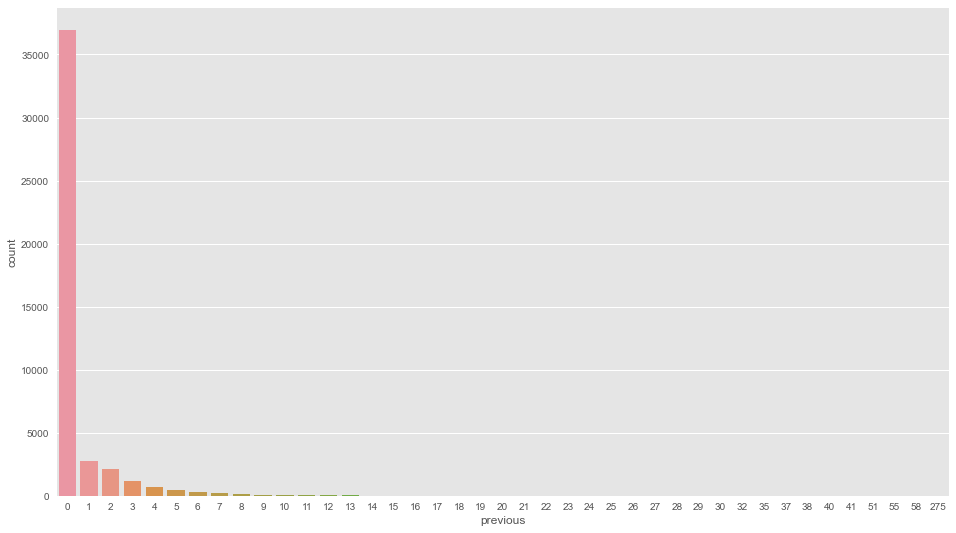

In [25]:
plt.figure(figsize=(16,9)) # set figure size.
previous = df['previous']
sns.countplot(df['previous'])

<br>
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">previous is positively skewed but it is not apparanent from the vizualization below</span>

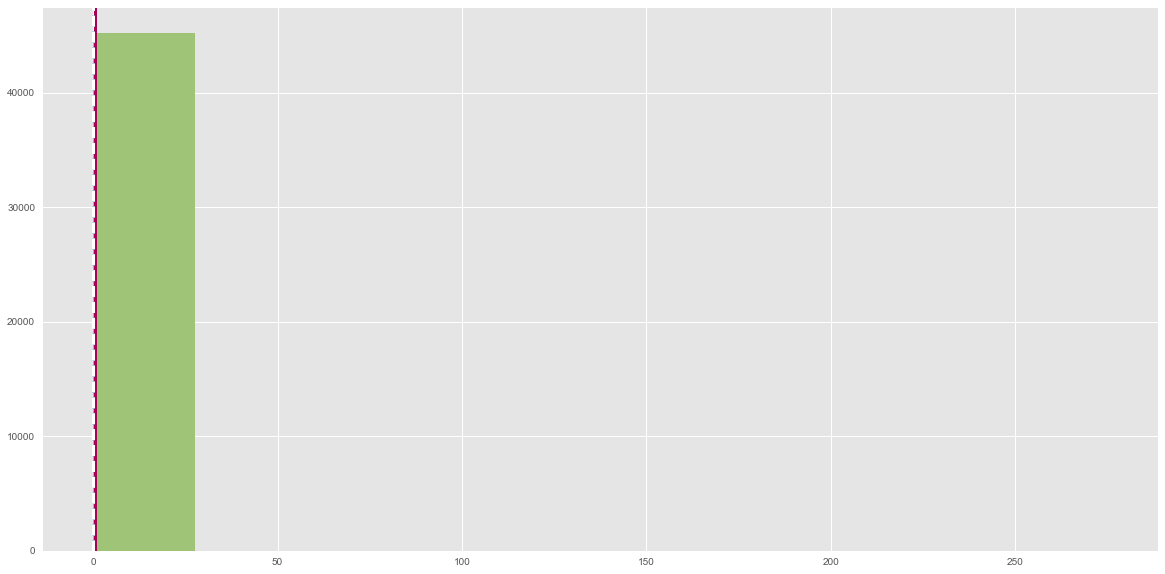

In [26]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(previous, color='g') # plots a simple histogram
plt.axvline(previous.mean(), color='m', linewidth=3)
plt.axvline(previous.median(), color='b', linestyle='dashed', linewidth=3)
plt.axvline(previous.mode()[0], color='w', linestyle='dashed', linewidth=3)

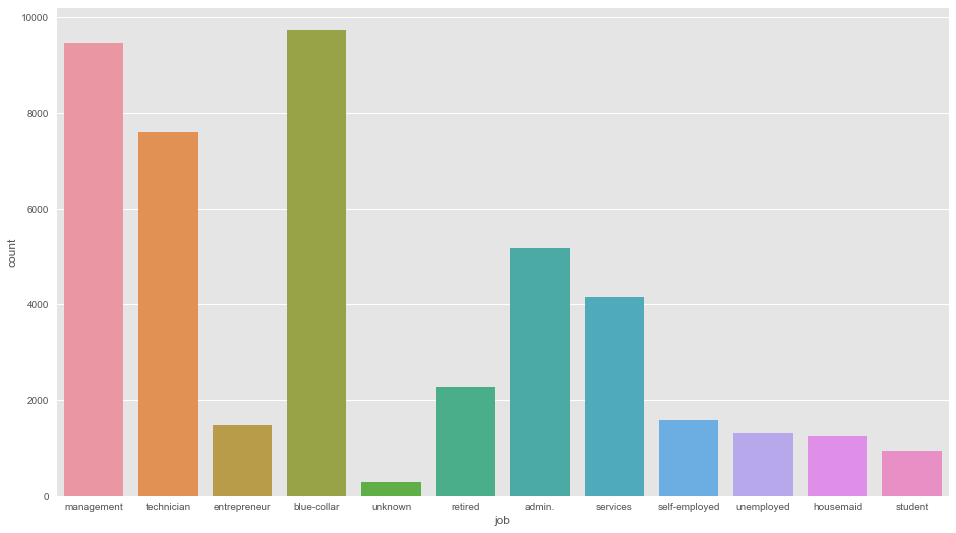

In [27]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['job'])

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Job is a categorical Variable. We may have to one-hot encode this value</span>

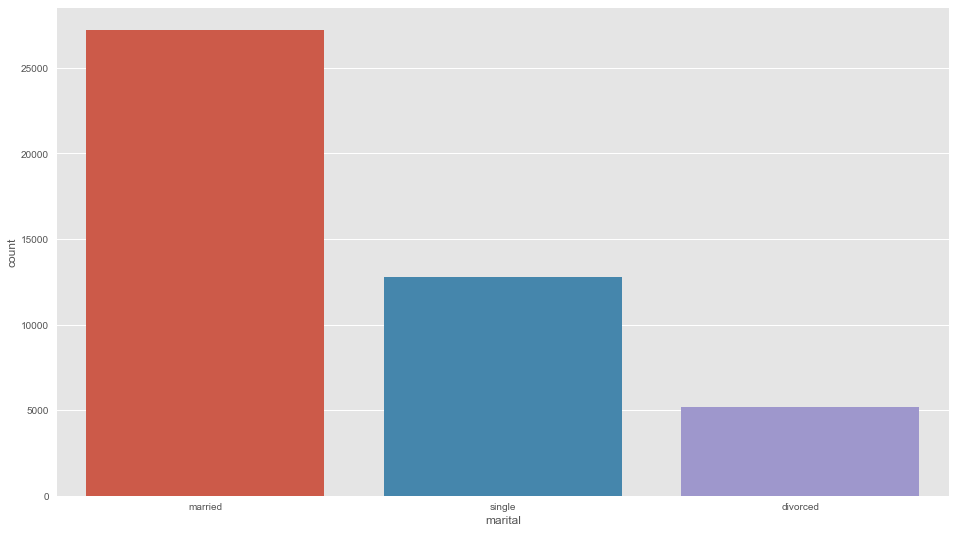

In [28]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['marital'])

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Marital is a categorical Variable. We may have to one-hot encode this value</span>

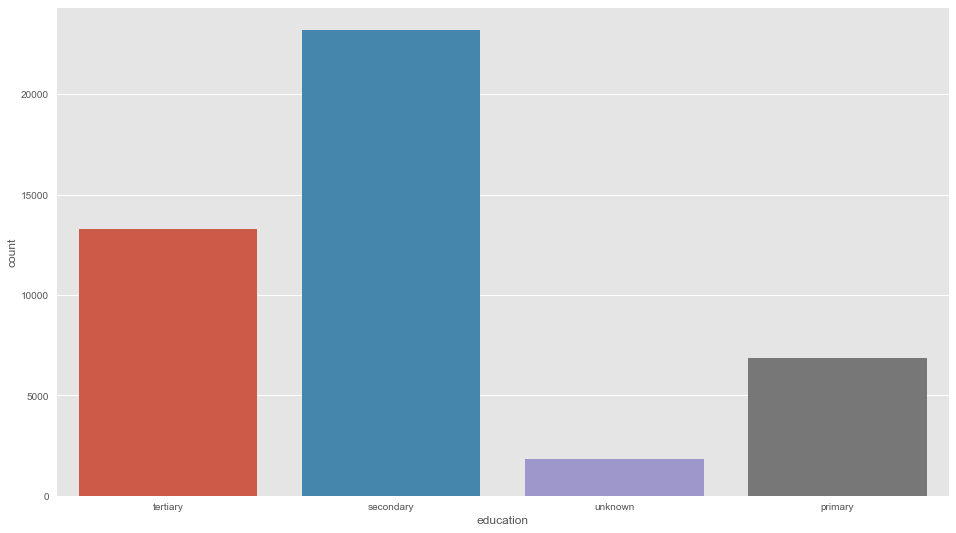

In [29]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['education'])

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Education is a categorical Variable. We may have to one-hot encode this value</span>

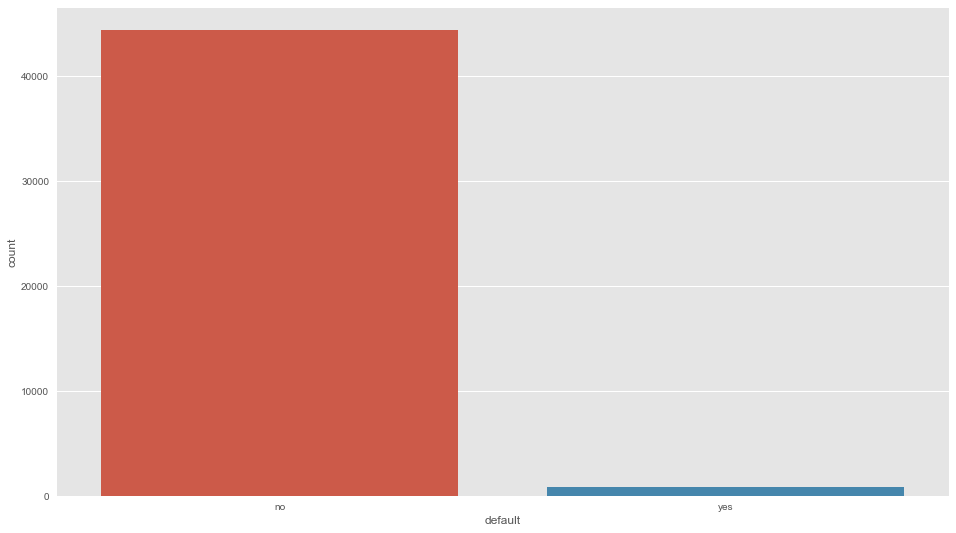

In [30]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['default'])

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Default is a categorical Variable. We may have to one-hot encode this value</span>

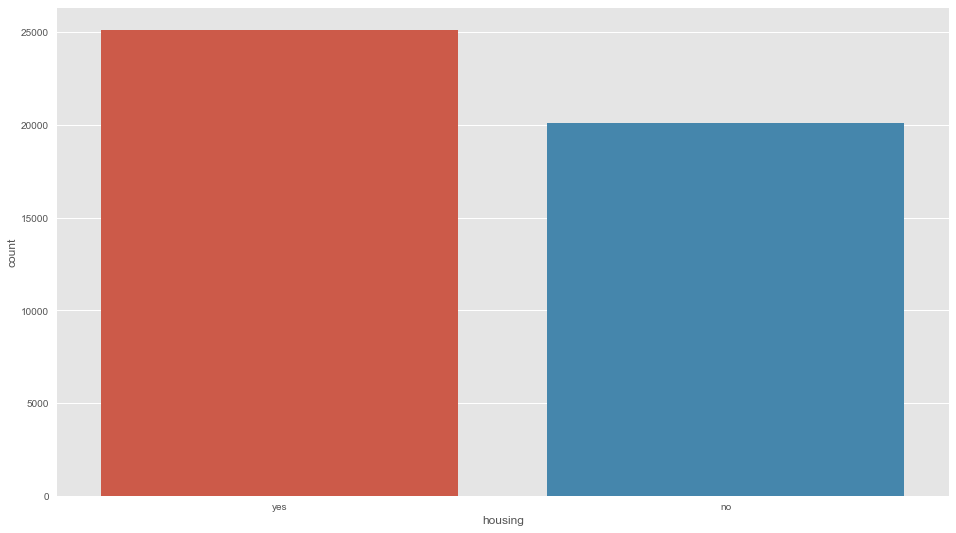

In [31]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['housing'])

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Housing is a categorical Variable. We may have to one-hot encode this value</span>

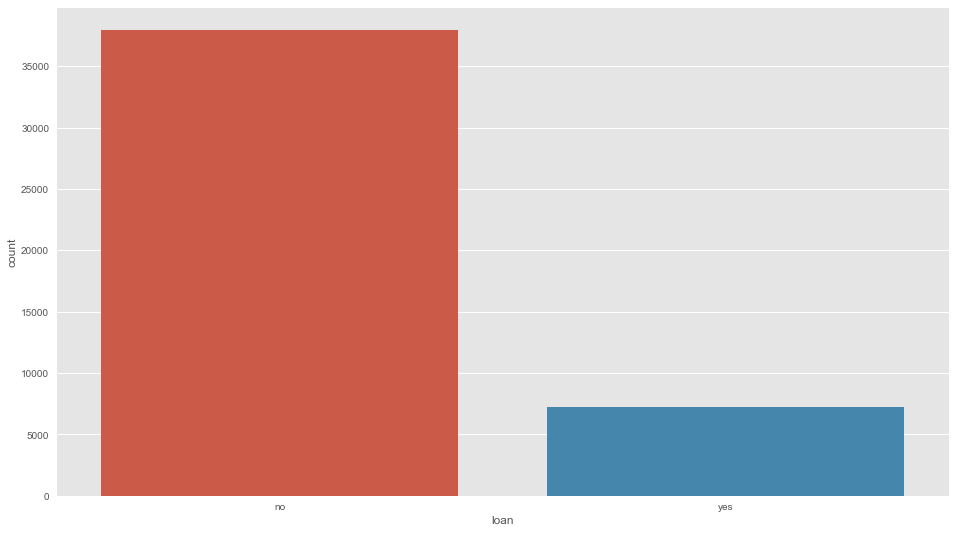

In [32]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['loan'])

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Loan is a categorical Variable. We may have to one-hot encode this value</span>

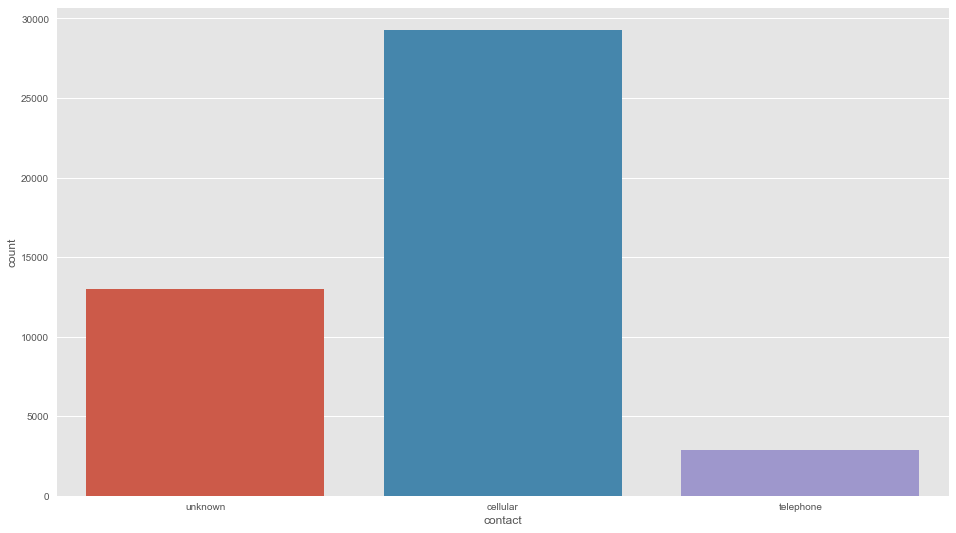

In [33]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['contact'])

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Contact is a categorical Variable. We may have to one-hot encode this value. Cellular seems to be the main mode of communication</span>

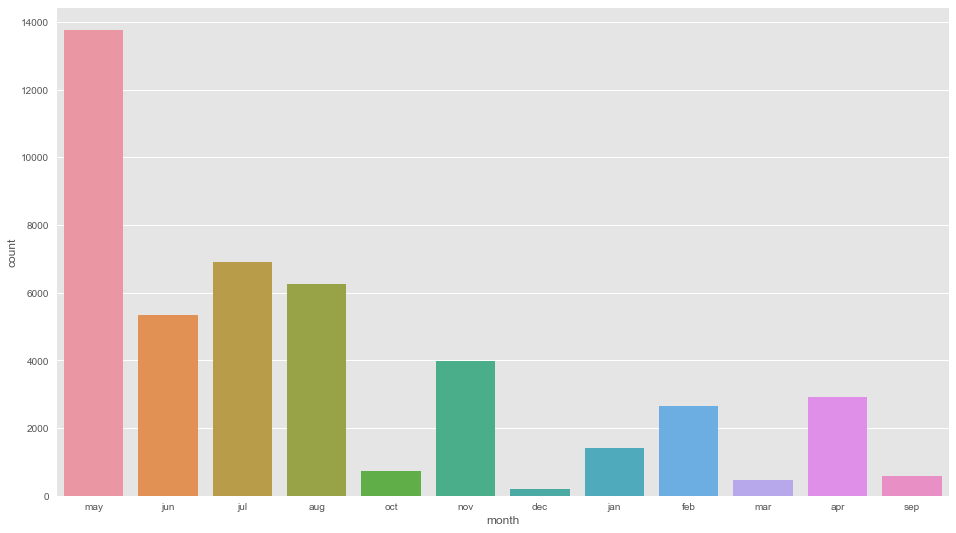

In [34]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['month'])

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Month is a categorical Variable. We may have to one-hot encode this value</span>

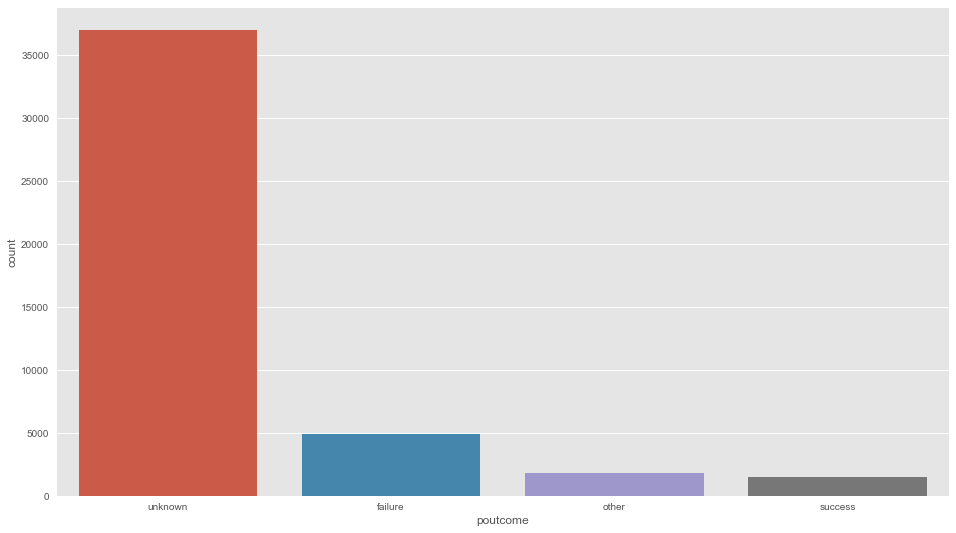

In [35]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['poutcome'])

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Poutcome is a categorical Variable. We may have to one-hot encode this value</span>

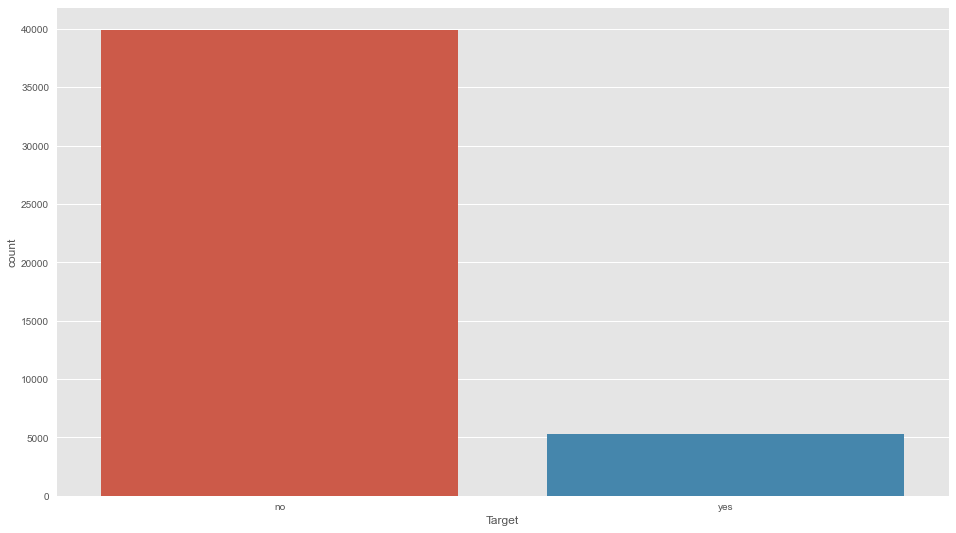

In [36]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['Target'])

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Target is a categorical Variable. This is also the target variable</span>

# Multivariate Analysis

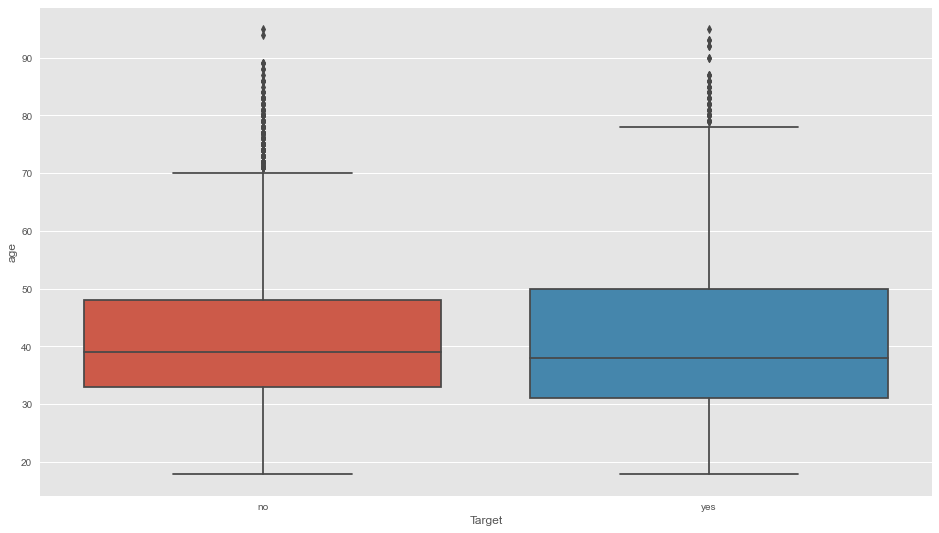

In [37]:
plt.figure(figsize=(16,9)) # set figure size.
sns.boxplot(data=df,x='Target',y='age')
plt.show()
# Looks like there are a lot of outliers here. We need to handle them.

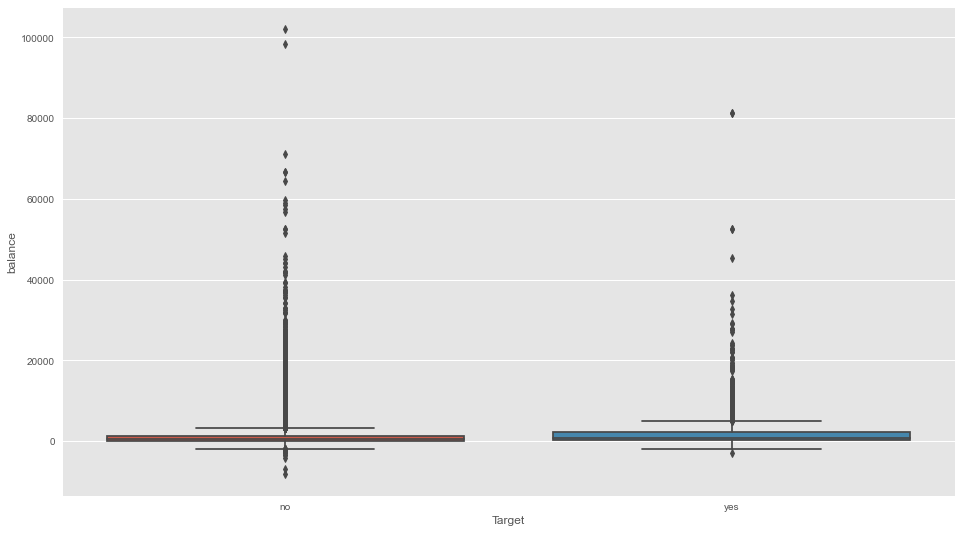

In [38]:
plt.figure(figsize=(16,9)) # set figure size.
sns.boxplot(data=df,x='Target',y='balance')
plt.show()
# Looks like there are a lot of outliers here. We need to handle them.

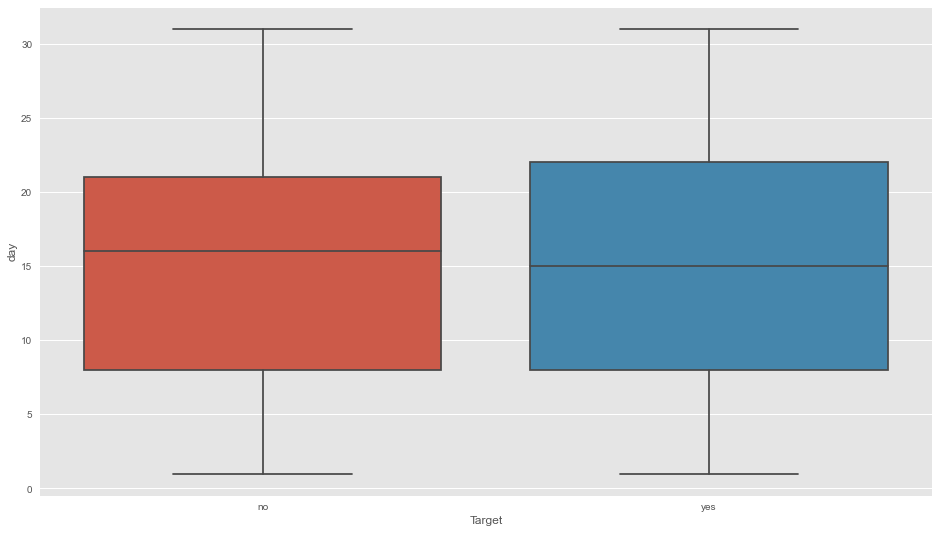

In [39]:
plt.figure(figsize=(16,9)) # set figure size.
sns.boxplot(data=df,x='Target',y='day')
plt.show()
# No outliers here. 

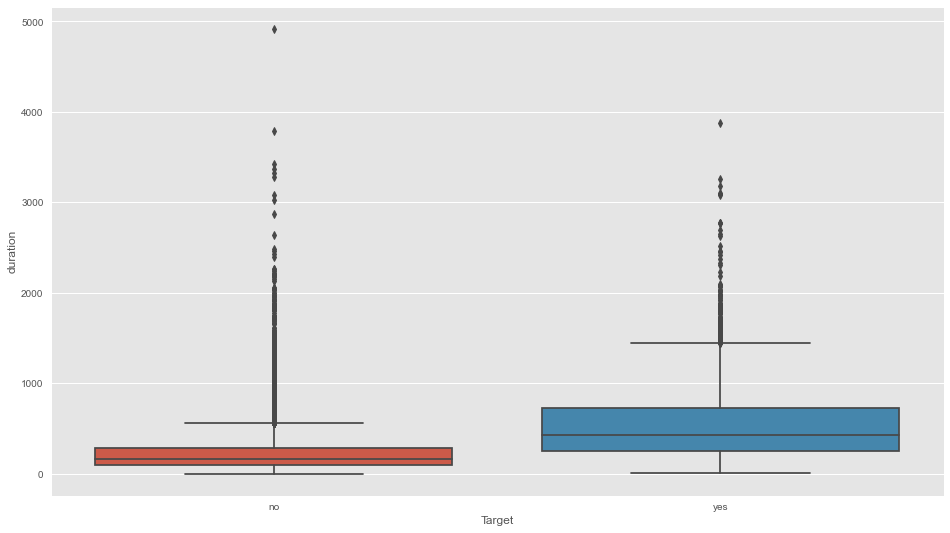

In [40]:
plt.figure(figsize=(16,9)) # set figure size.
sns.boxplot(data=df,x='Target',y='duration')
plt.show()
# Looks like there are a lot of outliers here. We need to handle them.

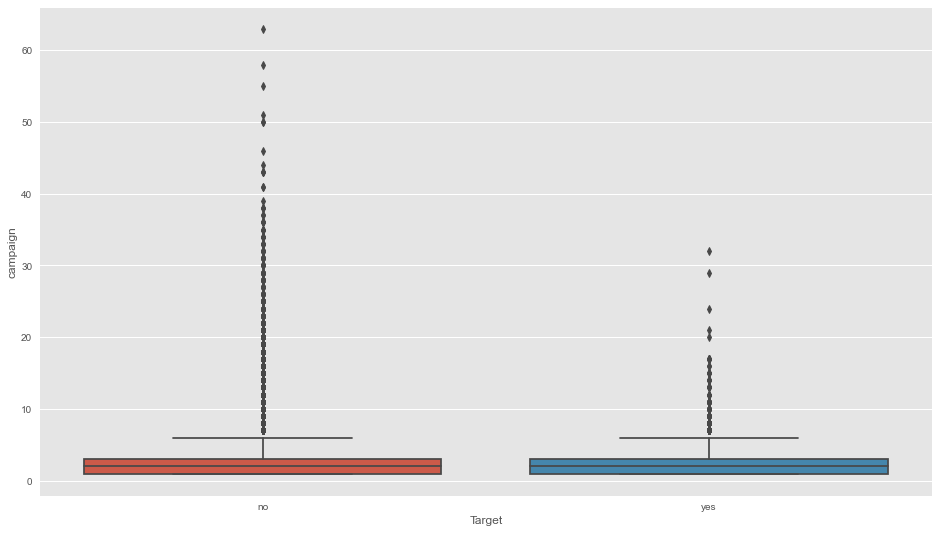

In [41]:
plt.figure(figsize=(16,9)) # set figure size.
sns.boxplot(data=df,x='Target',y='campaign')
plt.show()
# Looks like there are a lot of outliers here. We need to handle them.

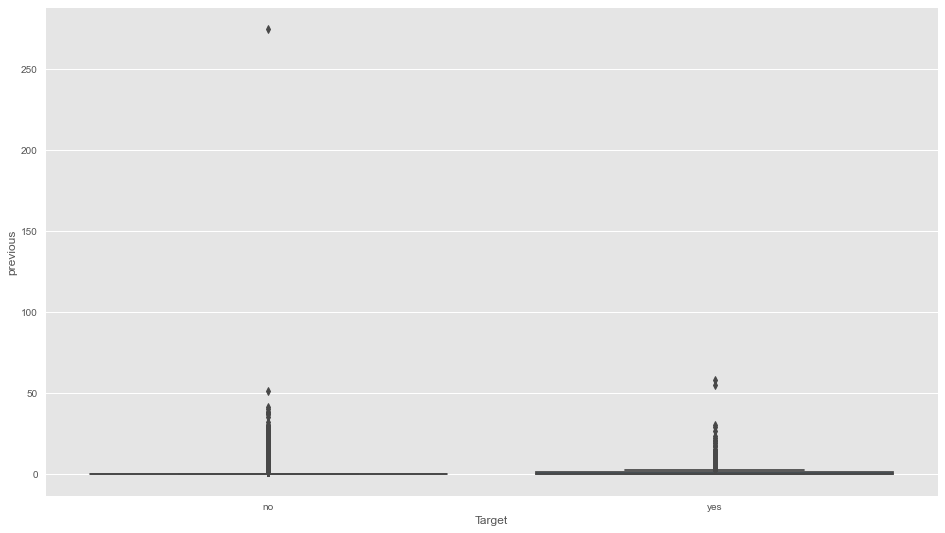

In [42]:
plt.figure(figsize=(16,9)) # set figure size.
sns.boxplot(data=df,x='Target',y='previous')
plt.show()
# Looks like there are a lot of outliers here. We need to handle them.

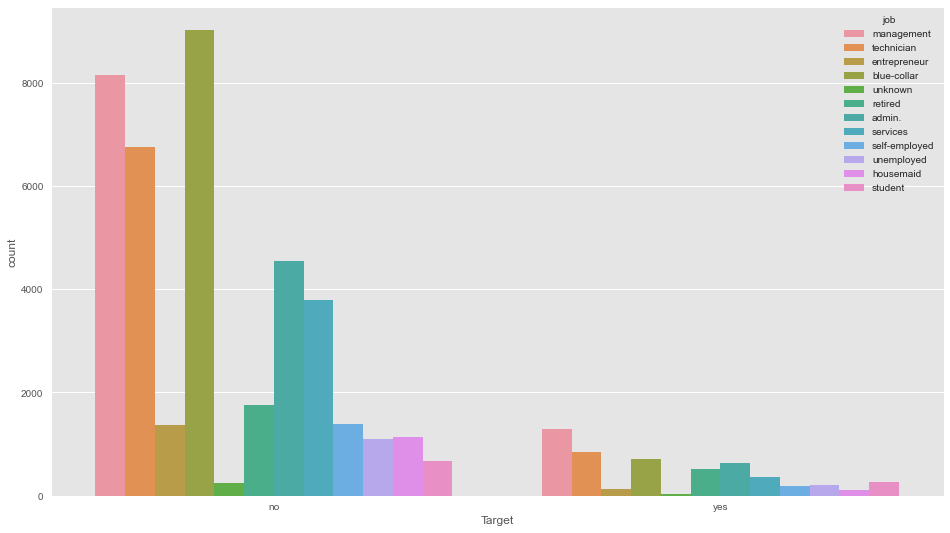

In [43]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['Target'], hue = df['job'])
#Lot of success in management, Technicician and Blue-Collor workers. Admin, retired and services also has lot of success.

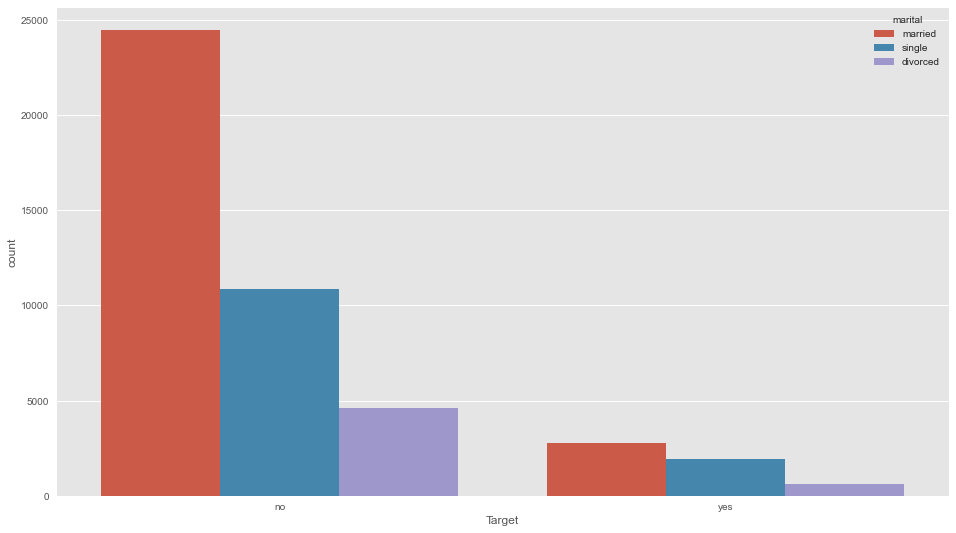

In [44]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['Target'], hue = df['marital'])
# Married people are the largest group. We have lot of success in Married and single folks. Also the relative success in the divoced 
#group when compared to their total numbers.  

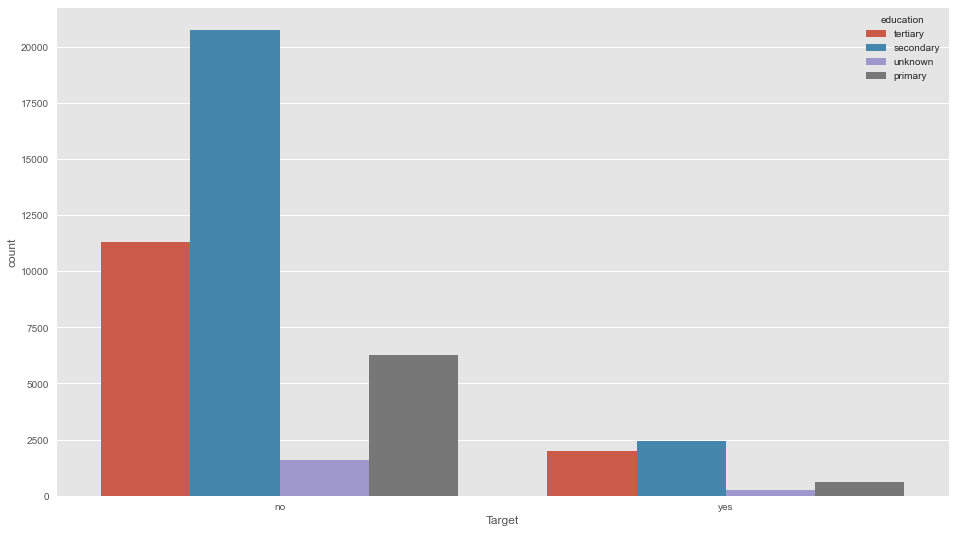

In [45]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['Target'], hue = df['education'])
#A lot of success in the Secondare and Tertiary education categories. Lot of success in primary group as proportion of their total numbers. This is just from Visual 
#inspection.

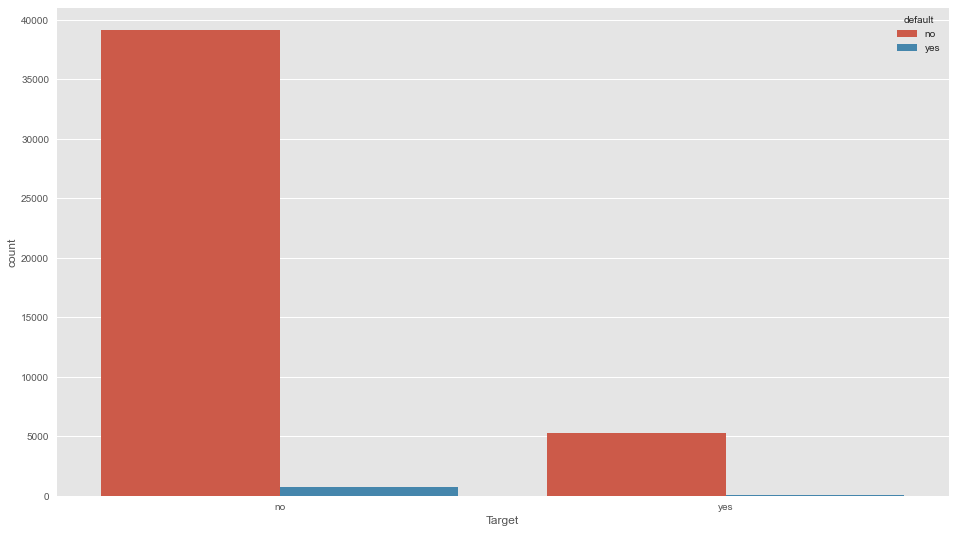

In [46]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['Target'], hue = df['default'])
#Lot of success from non defaulters.

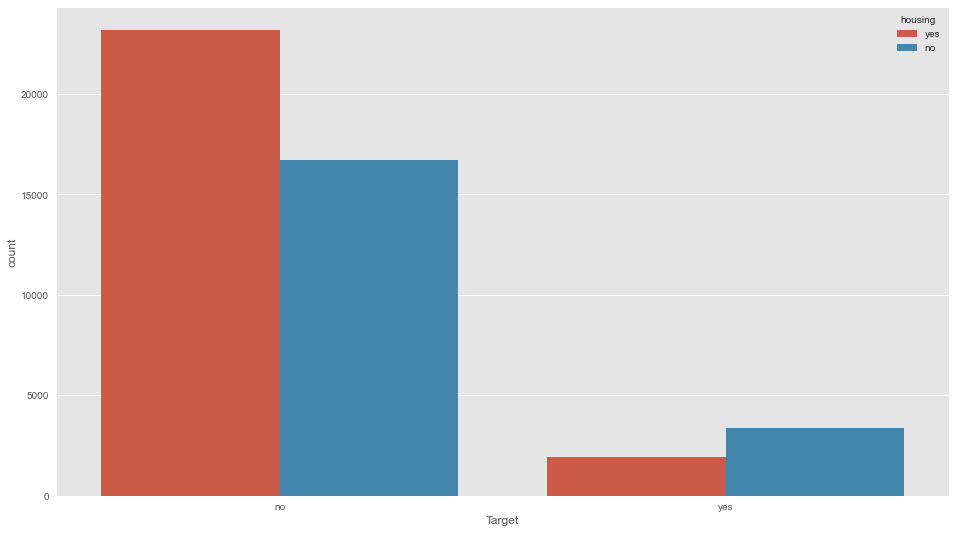

In [47]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['Target'], hue = df['housing'])
#Lot of success in non home owners.

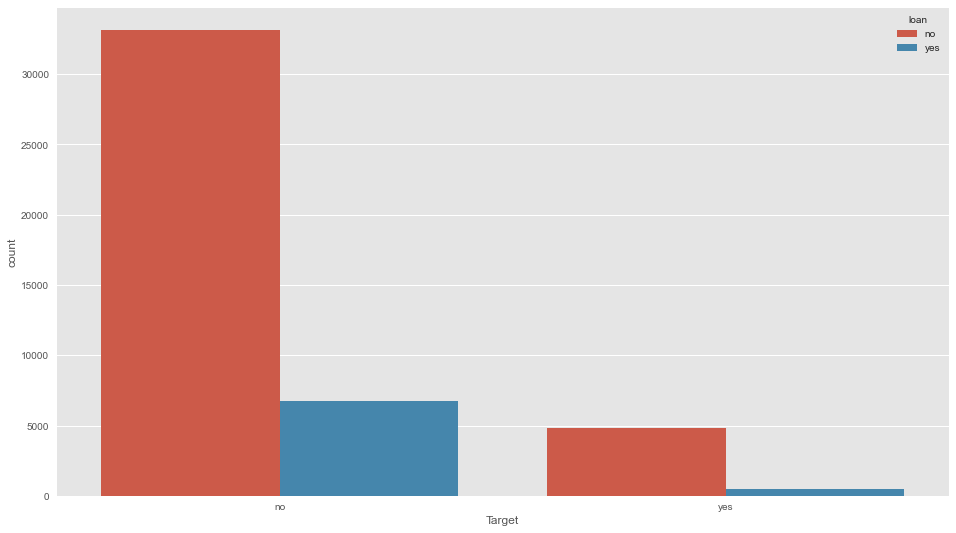

In [48]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['Target'], hue = df['loan'])
#Lot of success in non loan applicants.

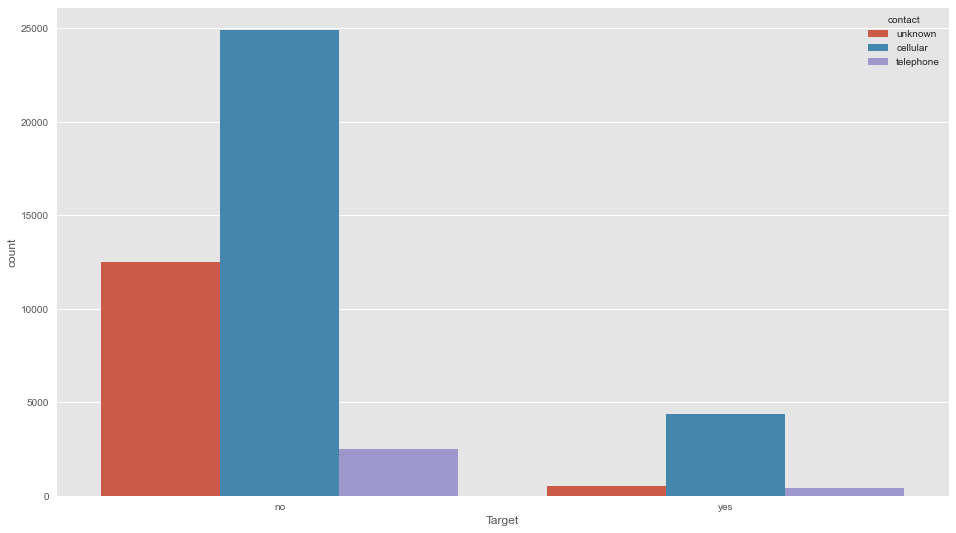

In [49]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['Target'], hue = df['contact'])
# Lot of success through cellural contact. Celluar seems to be most preferred from of contact.

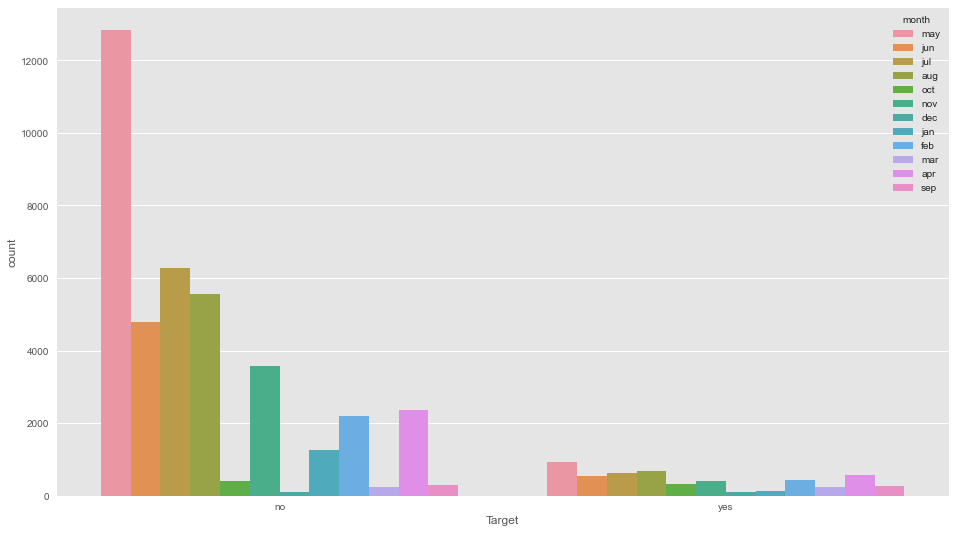

In [50]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['Target'], hue = df['month'])
#A lot of contact in May and also success. Apr has a lot of success in proportion to the calls. Just from visual inspection.

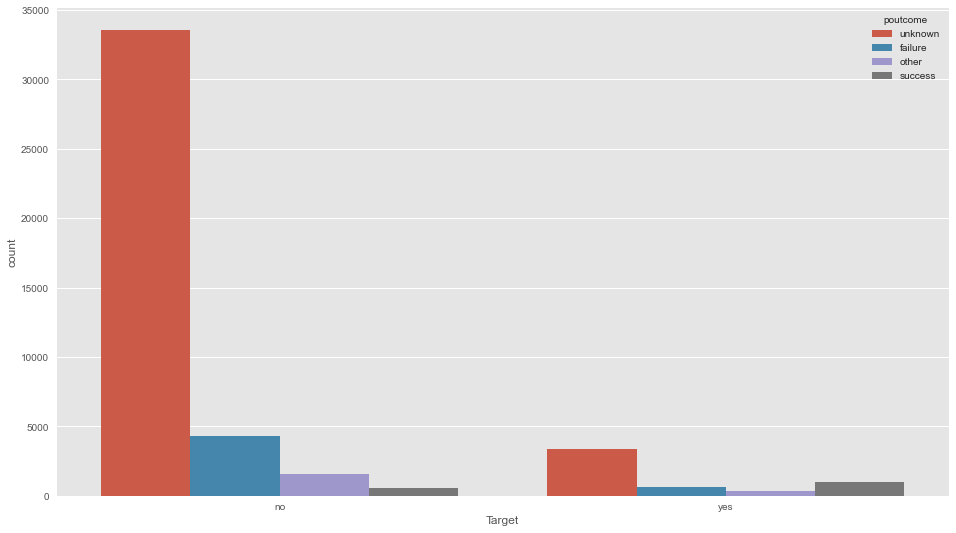

In [51]:
plt.figure(figsize=(16,9)) # set figure size.
sns.countplot(df['Target'], hue = df['poutcome'])
#Previously Unknow is the largest group and we had most success in this group. 

In [52]:
df.cov() # Prints the covariance of each attribute against every other attribute

,age,balance,day,duration,campaign,pdays,previous
age,112.76,"3,161.48",-0.81,-12.71,0.16,-25.26,0.03
balance,"3,161.48","9,270,598.95",114.10,"16,905.75",-137.51,"1,047.32",116.94
day,-0.81,114.10,69.26,-64.74,4.19,-77.54,-0.99
duration,-12.71,"16,905.75",-64.74,"66,320.57",-67.47,-40.35,0.71
campaign,0.16,-137.51,4.19,-67.47,9.60,-27.49,-0.23
pdays,-25.26,"1,047.32",-77.54,-40.35,-27.49,"10,025.77",104.90
previous,0.03,116.94,-0.99,0.71,-0.23,104.90,5.31


In [53]:
df.skew()   # to measure the skewness of every attribute

age         0.68
balance     8.36
day         0.09
duration    3.14
campaign    4.90
pdays       2.62
previous   41.85
dtype: float64

In [54]:
df.corr()  # prints the correlation coefficient between every pair of attributes

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


# Use correlation method to observe the relationship between different variables and state your insights.

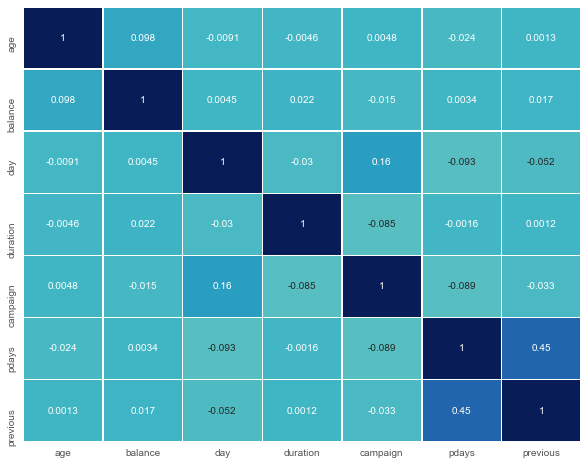

In [55]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()
# Pdays and Privious are most correlated. The rest all data does not show any significant correlation from the correlation heat map below.

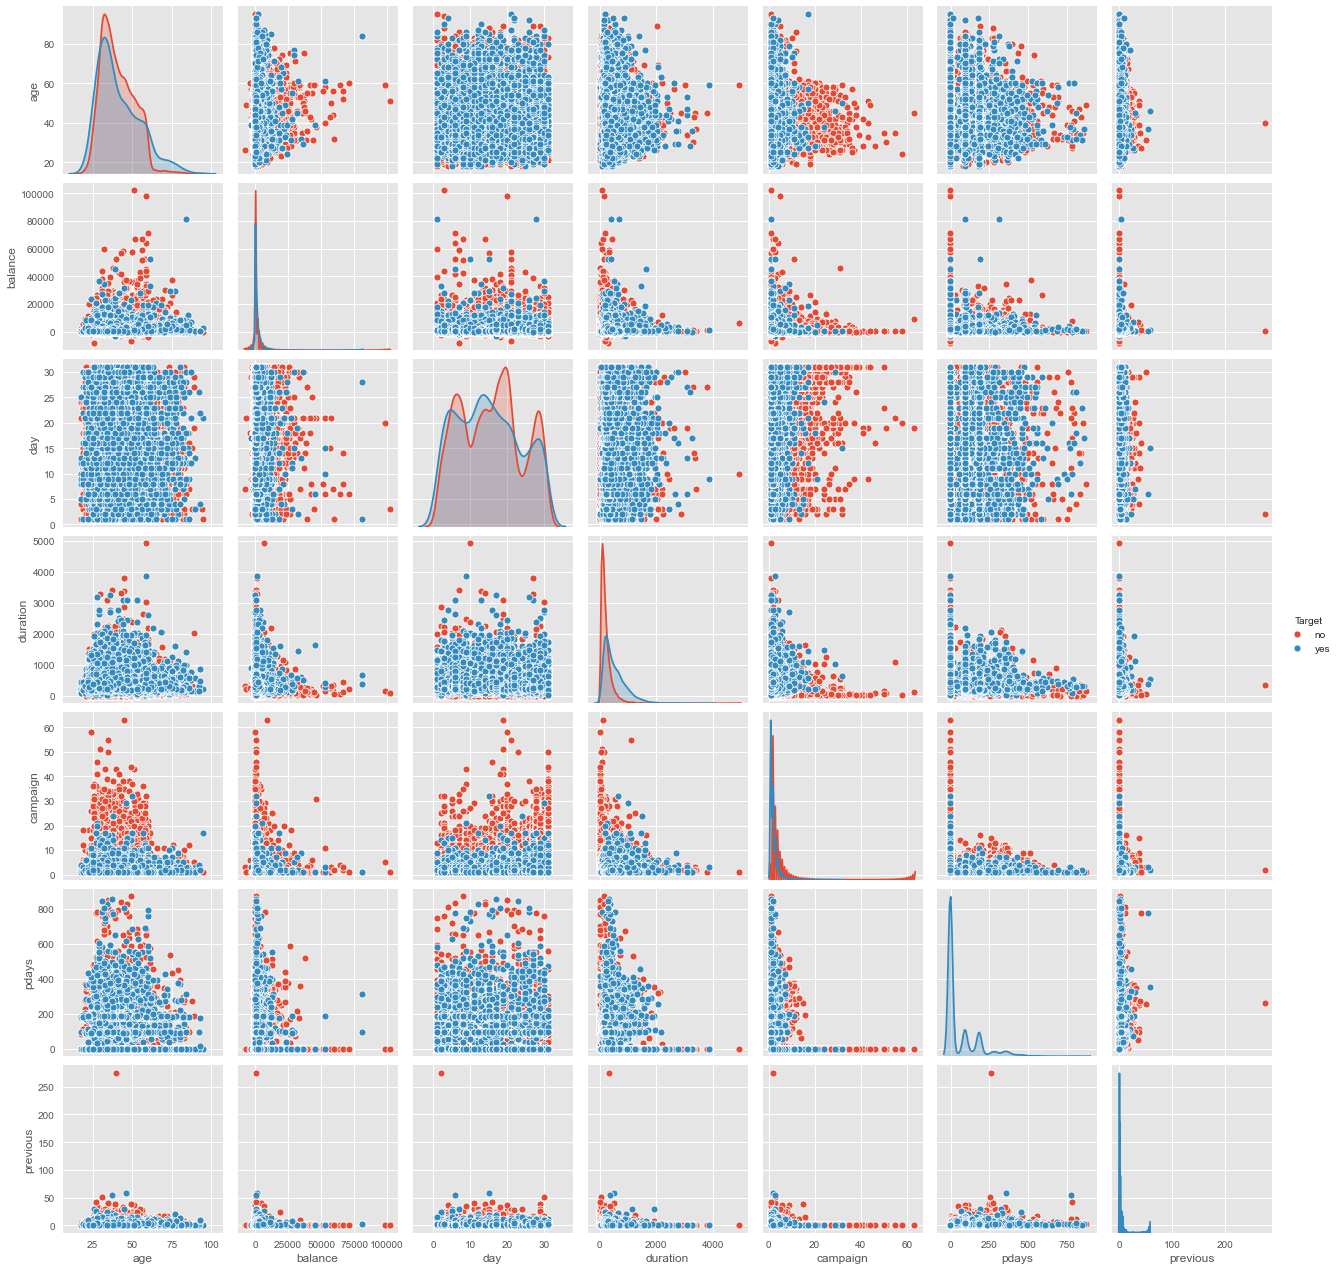

In [56]:
sns.pairplot(df, hue = 'Target')

###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Deliverable - 2: 
<font color=darkblue>
Prepare the data for analytics – (10) 
<br>Prepare Data for analysis
    
1. Ensure the attribute types are correct. If not, take appropriate actions. 

2. Get the data model ready.

3. Transform the data i.e. scale / normalize if required

4. Create the training set and test set in ratio of 70:30


In [57]:
df.info() # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [58]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [59]:
df.info() # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [60]:
print(df.age.value_counts())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64


In [61]:
print(df.job.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


In [62]:
print(df.marital.value_counts())

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


In [63]:
print(df.education.value_counts())

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


In [64]:
print(df.default.value_counts())

no     44396
yes      815
Name: default, dtype: int64


In [65]:
print(df.balance.value_counts())

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64


In [66]:
print(df.housing.value_counts())

yes    25130
no     20081
Name: housing, dtype: int64


In [67]:
print(df.loan.value_counts())

no     37967
yes     7244
Name: loan, dtype: int64


In [68]:
print(df.contact.value_counts())

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


In [69]:
print(df.day.value_counts())

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64


In [70]:
print(df.month.value_counts())

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


In [71]:
print(df.duration.value_counts())

124     188
90      184
89      177
122     175
104     175
       ... 
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64


In [72]:
print(df.campaign.value_counts())

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64


In [73]:
print(df.pdays.value_counts())

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64


In [74]:
print(df.previous.value_counts())

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64


In [75]:
print(df.poutcome.value_counts())

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


In [76]:
print(df.Target.value_counts())

no     39922
yes     5289
Name: Target, dtype: int64


#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">One Hot Encoding

In [77]:
replaceStruct = { 
                  "education": {"unknown": 0, "primary": 1, "secondary": 2, "tertiary": 3},
                  "default"  : {"no": 0, "yes": 1},
                  "housing"  : {"no": 0, "yes": 1},
                  "loan"     : {"no": 0, "yes": 1},
                  "month"    : {"jan": 1, "feb": 2, "mar": 3, "apr": 4,  "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                  "Target"   : {"no": 0, "yes": 1}
                }
oneHotCols=[ "job", "marital",  "contact", "poutcome"]


In [78]:
df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,0,2143,1,0,5,5,261,1,...,0,1,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,...,0,0,1,0,0,1,0,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,0,1,0,0,0,1,0,0,0,1
3,47,0,0,1506,1,0,5,5,92,1,...,0,1,0,0,0,1,0,0,0,1
4,33,0,0,1,0,0,5,5,198,1,...,0,0,1,0,0,1,0,0,0,1
5,35,3,0,231,1,0,5,5,139,1,...,0,1,0,0,0,1,0,0,0,1
6,28,3,0,447,1,1,5,5,217,1,...,0,0,1,0,0,1,0,0,0,1
7,42,3,1,2,1,0,5,5,380,1,...,1,0,0,0,0,1,0,0,0,1
8,58,1,0,121,1,0,5,5,50,1,...,0,1,0,0,0,1,0,0,0,1
9,43,2,0,593,1,0,5,5,55,1,...,0,0,1,0,0,1,0,0,0,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   education          45211 non-null  int64
 2   default            45211 non-null  int64
 3   balance            45211 non-null  int64
 4   housing            45211 non-null  int64
 5   loan               45211 non-null  int64
 6   day                45211 non-null  int64
 7   month              45211 non-null  int64
 8   duration           45211 non-null  int64
 9   campaign           45211 non-null  int64
 10  pdays              45211 non-null  int64
 11  previous           45211 non-null  int64
 12  Target             45211 non-null  int64
 13  job_admin.         45211 non-null  uint8
 14  job_blue-collar    45211 non-null  uint8
 15  job_entrepreneur   45211 non-null  uint8
 16  job_housemaid      45211 non-null  uint8
 17  job_manageme

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> IQR  -

In [80]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                    15.00
education               1.00
default                 0.00
balance             1,356.00
housing                 1.00
loan                    0.00
day                    13.00
month                   3.00
duration              216.00
campaign                2.00
pdays                   0.00
previous                0.00
Target                  0.00
job_admin.              0.00
job_blue-collar         0.00
job_entrepreneur        0.00
job_housemaid           0.00
job_management          0.00
job_retired             0.00
job_self-employed       0.00
job_services            0.00
job_student             0.00
job_technician          0.00
job_unemployed          0.00
job_unknown             0.00
marital_divorced        0.00
marital_married         1.00
marital_single          1.00
contact_cellular        1.00
contact_telephone       0.00
contact_unknown         1.00
poutcome_failure        0.00
poutcome_other          0.00
poutcome_success        0.00
poutcome_unkno

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Working with Outliers: Correcting, Removing

Use previously calculated IQR score to filter out the outliers by keeping only valid values.

In [81]:
"""
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
df_out.shape
"""

'\ndf_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers\ndf_out.shape\n'

In [82]:
"""
Term_Deposit_Sale_df = df.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(Term_Deposit_Sale_df < Q1 - 1.5 * IQR)[0], np.where(Term_Deposit_Sale_df < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    Term_Deposit_Sale_df.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(Term_Deposit_Sale_df > Q3 + 1.5 * IQR)[0], np.where(Term_Deposit_Sale_df > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    Term_Deposit_Sale_df.iloc[i,j] = whisker[j]
"""

'\nTerm_Deposit_Sale_df = df.copy()\n\n# Replace every outlier on the lower side by the lower whisker\nfor i, j in zip(np.where(Term_Deposit_Sale_df < Q1 - 1.5 * IQR)[0], np.where(Term_Deposit_Sale_df < Q1 - 1.5 * IQR)[1]): \n    \n    whisker  = Q1 - 1.5 * IQR\n    Term_Deposit_Sale_df.iloc[i,j] = whisker[j]\n    \n    \n#Replace every outlier on the upper side by the upper whisker    \nfor i, j in zip(np.where(Term_Deposit_Sale_df > Q3 + 1.5 * IQR)[0], np.where(Term_Deposit_Sale_df > Q3 + 1.5 * IQR)[1]):\n    \n    whisker  = Q3 + 1.5 * IQR\n    Term_Deposit_Sale_df.iloc[i,j] = whisker[j]\n'

In [83]:
#Term_Deposit_Sale_df.shape, df.shape

## Split Data

In [84]:
sim_df = df.copy()
features = [col for col in df.columns if col != 'Target']
X = sim_df.drop("Target" , axis=1)
y = sim_df.pop("Target")

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

Lets check split of data

In [86]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Deliverable - 3: 
<font color=darkblue>
Log Reg & Decision Tree (10) 
<br>Ensemble Model (3 atleast, (15))
<br>Conclusion (5)
    
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks) 

2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)


## Use Logistic Regression model to predict whether the customer will take Term Deposit Account

In [87]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

      0    1     2    3     4     5     6     7    8     9  ...    25    26  \
0 -0.01 0.05 -0.15 0.00 -0.85 -0.58 -0.01 -0.02 0.00 -0.10  ... -0.42 -0.16   

    27   28    29    30    31   32    33  intercept  
0 0.08 0.12 -1.03 -0.69 -0.44 1.49 -1.19      -0.83  

[1 rows x 35 columns]


In [88]:
#Test accuracy calculation
model_score = model.score(X_test, y_test)
print(model_score)

0.9001032143910351


In [89]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.899895724713243

Testing accuracy 0.9001032143910351

Confusion Matrix


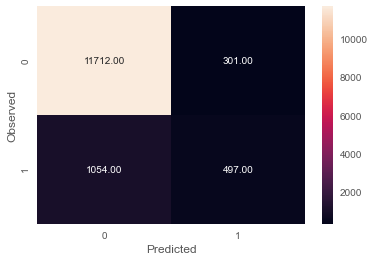

None

Recall: 0.32043842682140555

Precision: 0.6228070175438597

F1 Score: 0.42315879097488296

Roc Auc Score: 0.6476911188464807


In [90]:
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

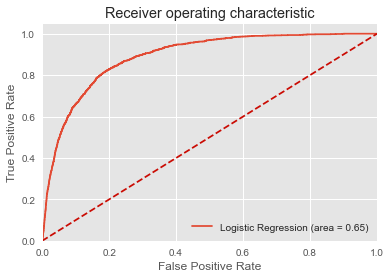

In [91]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [92]:
# Checking Parameters of logistic regression
model.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [93]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.9, 0.888, 0.9, 0.882, 0.882]

[0.901, 0.89, 0.901, 0.886, 0.885]


In [94]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.9, 0.882]

[0.901, 0.885]


In [95]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.898, 0.9, 0.9, 0.9, 0.9, 0.9]

[0.899, 0.901, 0.901, 0.901, 0.901, 0.901]


#### Best testing accuracy is obtained for C=0.75

Trainig accuracy 0.9004329004329005

Testing accuracy 0.9009879091713359

Confusion Matrix


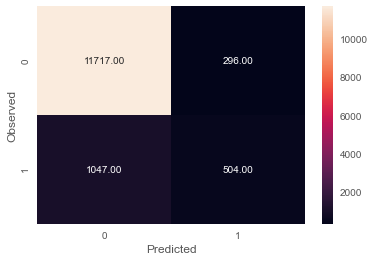

None

Recall: 0.32495164410058025

Precision: 0.63

F1 Score: 0.42875372182050187

Roc Auc Score: 0.6501558353691946


In [96]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=0.75) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))
acc_LR = accuracy_score(y_test, y_predict)
recall_LR = recall_score(y_test,y_predict)
precision_LR = precision_score(y_test,y_predict)
f1_LR = f1_score(y_test,y_predict)

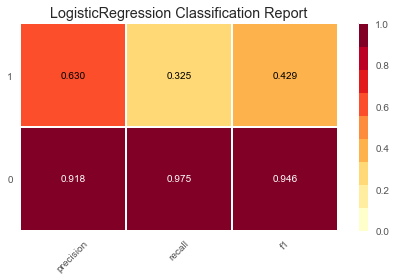

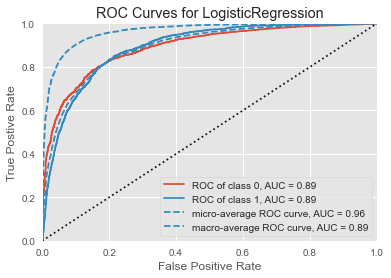

In [97]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.

In [98]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  

model_entropy = DecisionTreeClassifier(criterion='entropy')

In [99]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Print the accuracy of the model & print the confusion matrix

In [100]:
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.88


#### There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting. 

#### Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [101]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [102]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [103]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # performance on test data

Train: 0.90
Test: 0.90


## Visualizing the tree

In [104]:
y_train.value_counts()

0    27909
1     3738
Name: Target, dtype: int64

In [105]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

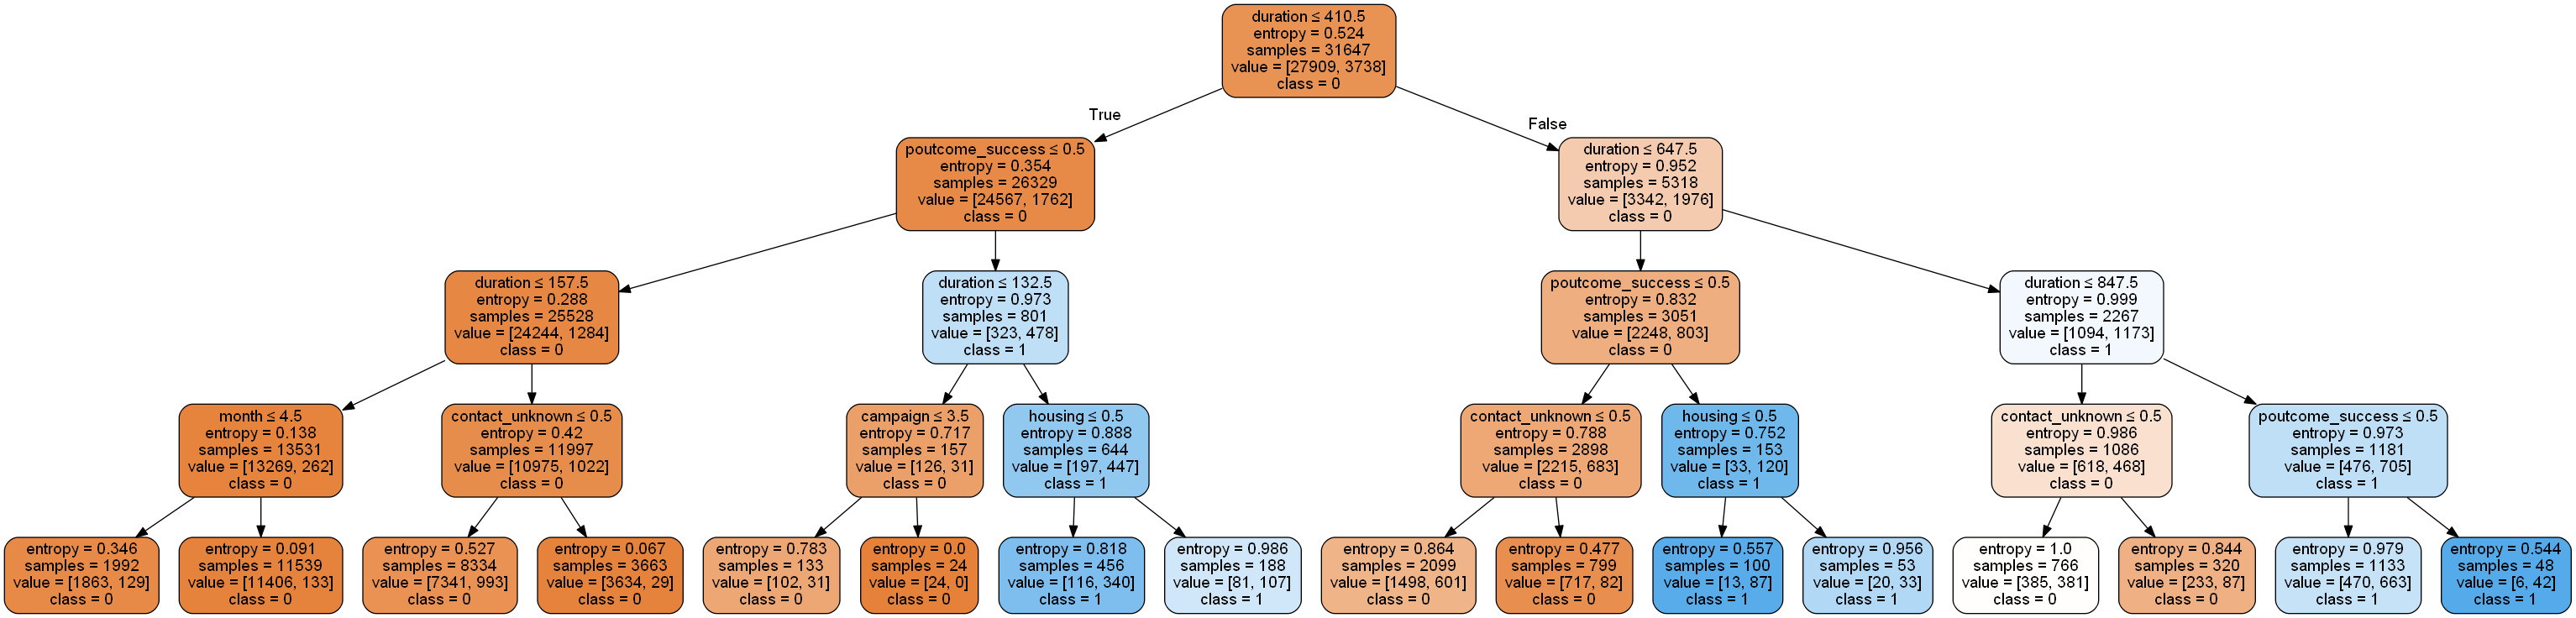

In [106]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('deposit_pruned.png')
Image(graph.create_png())

In [107]:
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)
recall_DT = recall_score(y_test,preds_test)
precision_DT = precision_score(y_test,preds_test)
f1_DT = f1_score(y_test,preds_test)

## Decision tree performance

In [108]:
# Confusion matrix
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11701,312
1,1025,526


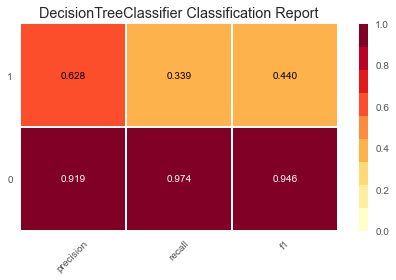

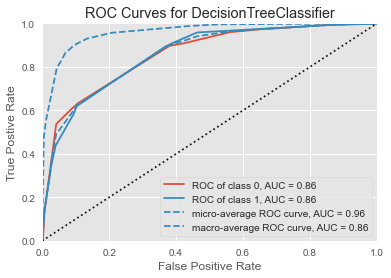

In [109]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

#### Performance metrics

- __Precision__: Fraction of actuals per label that were correctly classified by the model
- __Recall__: Fraction of predictions that were correctly classified by the model
- __F1-score__: Weighted harmonic mean of the precision and recall. F1-score: 2 * (precision * recall) / (precision + recall)
- __Support__: Number of occurrences of each class in y_test
- __Accuracy__: Fraction of all observations that were correctly classified by the model
- __Macro avg__: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
- __Micro/weighted avg__: Calculate metrics globally by counting the total true positives, false negatives and false positives
- __AUC Score__: Given a random observation from the dataset that belongs to a class, and a random observation that doesn't belong to a class, the AUC is the perecentage of time that our model will classify which is which correctly

In [110]:
df['TargetQuality_No'] = clf_pruned.predict_proba(df[features])[:,0]
df['TargetQuality_Yes'] = clf_pruned.predict_proba(df[features])[:,1]
df.head(10)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,TargetQuality_No,TargetQuality_Yes
0,58,3,0,2143,1,0,5,5,261,1,...,0,0,0,1,0,0,0,1,0.99,0.01
1,44,2,0,29,1,0,5,5,151,1,...,1,0,0,1,0,0,0,1,0.99,0.01
2,33,2,0,2,1,1,5,5,76,1,...,0,0,0,1,0,0,0,1,0.99,0.01
3,47,0,0,1506,1,0,5,5,92,1,...,0,0,0,1,0,0,0,1,0.99,0.01
4,33,0,0,1,0,0,5,5,198,1,...,1,0,0,1,0,0,0,1,0.99,0.01
5,35,3,0,231,1,0,5,5,139,1,...,0,0,0,1,0,0,0,1,0.99,0.01
6,28,3,0,447,1,1,5,5,217,1,...,1,0,0,1,0,0,0,1,0.99,0.01
7,42,3,1,2,1,0,5,5,380,1,...,0,0,0,1,0,0,0,1,0.99,0.01
8,58,1,0,121,1,0,5,5,50,1,...,0,0,0,1,0,0,0,1,0.99,0.01
9,43,2,0,593,1,0,5,5,55,1,...,1,0,0,1,0,0,0,1,0.99,0.01


### When the tree is regularised, overfitting is reduced, but there is no increase in accuracy

In [111]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.60
poutcome_success,0.27
contact_unknown,0.10
month,0.03
housing,0.00
campaign,0.00
marital_single,0.00
job_technician,0.00
job_unemployed,0.00
job_unknown,0.00


#### From the feature importance dataframe we can infer that duration, poutcome_success, contact_unknown impact the "Term Deposit Sale" prediction.

In [112]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': acc_LR, 'recall': recall_LR, 'precision': precision_LR, 'f1': f1_LR})
resultsDf = resultsDf[['Method', 'accuracy', 'recall', 'precision', 'f1']]
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT, 'recall': recall_DT, 'precision': precision_DT, 'f1': f1_DT})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall', 'precision', 'f1']]
resultsDf

,Method,accuracy,recall,precision,f1
0,Logistic Regression,0.90,0.32,0.63,0.43
0,Decision Tree,0.90,0.34,0.63,0.44


### Apply the Random forest model and print the accuracy of Random forest Model

In [113]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [114]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
recall_RF = recall_score(y_test,pred_RF)
precision_RF = precision_score(y_test,pred_RF)
f1_RF = f1_score(y_test,pred_RF)

In [115]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF], 'recall': [recall_RF], 'precision': [precision_RF], 'f1': [f1_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall', 'precision', 'f1']]
resultsDf

,Method,accuracy,recall,precision,f1
0,Logistic Regression,0.90,0.32,0.63,0.43
0,Decision Tree,0.90,0.34,0.63,0.44
0,Random Forest,0.90,0.37,0.64,0.47


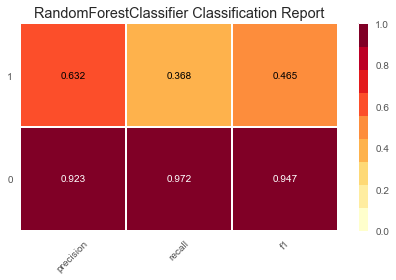

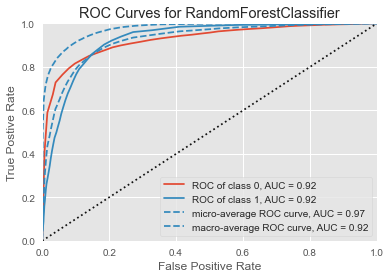

In [116]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

#### Compared to the decision tree, we can see that the accuracy has improved for the Random forest model

## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [117]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [118]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
recall_AB = recall_score(y_test,pred_AB)
precision_AB = precision_score(y_test,pred_AB)
f1_AB = f1_score(y_test,pred_AB)

In [119]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB], 'recall': [recall_AB], 'precision': [precision_AB], 'f1': [f1_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall', 'precision', 'f1']]
resultsDf

,Method,accuracy,recall,precision,f1
0,Logistic Regression,0.90,0.32,0.63,0.43
0,Decision Tree,0.90,0.34,0.63,0.44
0,Random Forest,0.90,0.37,0.64,0.47
0,Adaboost,0.90,0.22,0.65,0.33


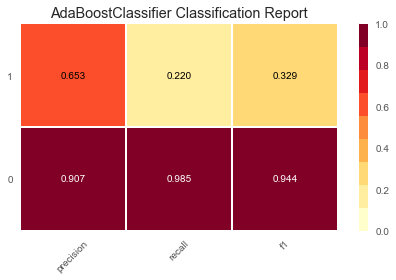

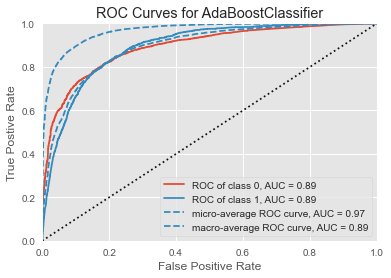

In [120]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Apply Bagging Classifier Algorithm and print the accuracy.

In [121]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [122]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
recall_BG = recall_score(y_test,pred_BG)
precision_BG = precision_score(y_test,pred_BG)
f1_BG = f1_score(y_test,pred_BG)

In [123]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG], 'recall': [recall_BG], 'precision': [precision_BG], 'f1': [f1_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall', 'precision', 'f1']]
resultsDf

,Method,accuracy,recall,precision,f1
0,Logistic Regression,0.90,0.32,0.63,0.43
0,Decision Tree,0.90,0.34,0.63,0.44
0,Random Forest,0.90,0.37,0.64,0.47
0,Adaboost,0.90,0.22,0.65,0.33
0,Bagging,0.91,0.48,0.62,0.54


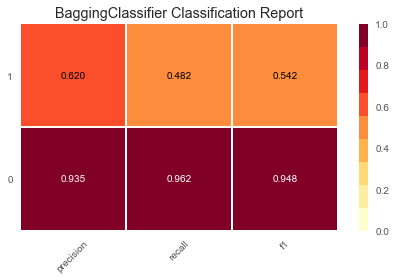

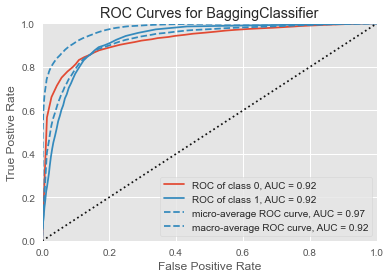

In [124]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [126]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)
recall_GB = recall_score(y_test,pred_GB)
precision_GB = precision_score(y_test,pred_GB)
f1_GB = f1_score(y_test,pred_GB)

In [127]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB], 'recall': [recall_GB], 'precision': [precision_GB], 'f1': [f1_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall', 'precision', 'f1']]
resultsDf

,Method,accuracy,recall,precision,f1
0,Logistic Regression,0.90,0.32,0.63,0.43
0,Decision Tree,0.90,0.34,0.63,0.44
0,Random Forest,0.90,0.37,0.64,0.47
0,Adaboost,0.90,0.22,0.65,0.33
0,Bagging,0.91,0.48,0.62,0.54
0,Gradient Boost,0.90,0.37,0.65,0.47


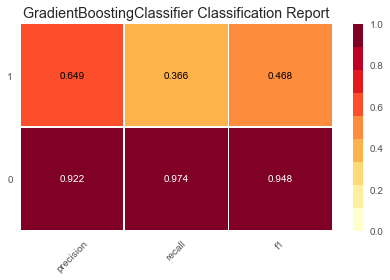

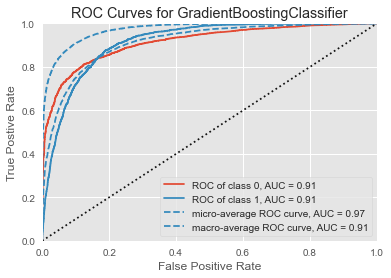

In [128]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

#### For this dataset, Random forest and Bagging models gave the best results on test predictions

In [129]:
resultsDf

,Method,accuracy,recall,precision,f1
0,Logistic Regression,0.90,0.32,0.63,0.43
0,Decision Tree,0.90,0.34,0.63,0.44
0,Random Forest,0.90,0.37,0.64,0.47
0,Adaboost,0.90,0.22,0.65,0.33
0,Bagging,0.91,0.48,0.62,0.54
0,Gradient Boost,0.90,0.37,0.65,0.47
